# Duluth Complex code introduction

This notebook plots contains data analysis and visualization associated with the manuscript

Swanson-Hysell, N.L., Hoaglund, S.A., Crowley, J.L., Schmitz, M.D., Zhang, Y., and Miller Jr., J.D. (2020), **Rapid emplacement of the massive Duluth Complex intrusions within the Midcontinent Rift**, *Geology*, doi:10.1130/G47873.1



Corresponding Author: Nicholas L. Swanson-Hysell (swanson-hysell@berkeley.edu)

# Import scientific Python modules

In [1]:
import pmagpy.pmag as pmag
import pmagpy.pmagplotlib as pmagplotlib
import pmagpy.ipmag as ipmag

from geochron_functions import plot_dates, weighted_mean

import mplstereonet

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

# Duluth Complex geochronology

New U-Pb dates developed from Duluth Complex and Beaver Bay Complex intrusive rocks can be compared to U-Pb dates developed from Midcontinent Rift volcanics and published in:

Swanson-Hysell, N.L., Ramenzani, J., Fairchild, L.M. and Rose, I., 2019, **Failed rifting and fast drifting: Midcontinent Rift development, Laurentia's rapid motion and the driver of Grenvillian orogenesis**, *Geological Society of America Bulletin*, doi:10.1130/B31944.1.

## Import individual zircon dates for the date bar plot and calculate weighted means

### PRI (Partridge River intrusion augite troctolite)

In [2]:
PRI = pd.read_excel('../data/geochron_new/CAIDTIMS_DataTable_080420.xls',
                      header=6,nrows=6,names=['zircon','Th_U','206Pb_mol','206Pb_mol%','Pb*/Pbc',
                                              'Pbc','206Pb/204Pb','','','','','','','','','','',
                                              '207Pb/206Pb_date','207Pb/206Pb_date_2sigma',
                                              '207Pb/235U_date','207Pb/235U_date_2sigma',
                                              '206Pb/238U_date','206Pb/238U_date_2sigma'])
PRI['include'] = pd.Series(data=['yes','yes','yes','yes','yes','yes'])
PRI

,zircon,Th_U,206Pb_mol,206Pb_mol%,Pb*/Pbc,Pbc,206Pb/204Pb,,.1,.2,.3,.4,.5,.6,.7,.8,.9,207Pb/206Pb_date,207Pb/206Pb_date_2sigma,207Pb/235U_date,207Pb/235U_date_2sigma,206Pb/238U_date,206Pb/238U_date_2sigma,include
0,z2,0.665204,20.738831,0.999465,598.997048,0.912757,34763.091318,NaN,0.201468,0.076115,0.042027,1.945654,0.084024,0.185393,0.045037,0.967479,NaN,1098.100543,0.840968,1096.949502,0.563532,1096.369296,0.454065,yes
1,z5,0.795390,15.370751,0.999298,470.376992,0.888256,26480.058244,NaN,0.240897,0.076087,0.041746,1.944886,0.083922,0.185388,0.044575,0.974036,NaN,1097.367406,0.835439,1096.684811,0.562770,1096.341199,0.449398,yes
2,z1,0.714043,21.496997,0.999219,414.920581,1.381772,23808.791473,NaN,0.216261,0.076084,0.043480,1.944671,0.085307,0.185375,0.045624,0.959467,NaN,1097.285151,0.870142,1096.610856,0.572040,1096.271661,0.459944,yes
3,z6,0.624498,12.483620,0.999191,391.978441,0.831426,22978.687310,NaN,0.189143,0.076096,0.038926,1.944592,0.083271,0.185339,0.045191,0.991360,NaN,1097.592711,0.778968,1096.583583,0.558374,1096.075160,0.455501,yes
4,z4,0.609620,11.022847,0.998837,271.821434,1.054866,15997.732443,NaN,0.184637,0.076106,0.045346,1.944827,0.087321,0.185336,0.046494,0.952037,NaN,1097.868085,0.907422,1096.664479,0.585555,1096.058666,0.468634,yes
5,z3,0.668869,4.580803,0.998332,192.103651,0.629200,11151.532746,NaN,0.202582,0.076132,0.055232,1.945424,0.094024,0.185329,0.047827,0.898106,NaN,1098.551154,1.105137,1096.870480,0.630570,1096.024042,0.482057,yes


In [3]:
PRI_mean, PRI_2sigma = weighted_mean(PRI['206Pb/238U_date'].tolist(),PRI['206Pb/238U_date_2sigma'].tolist())

The weighted mean is:
1096.1949149677969
With a 2sigma error of:
0.18829360877861095
N=
6


In [4]:
weighted_mean(PRI['207Pb/206Pb_date'].tolist(),PRI['207Pb/206Pb_date_2sigma'].tolist())

The weighted mean is:
1097.7339098613106
With a 2sigma error of:
0.3569444447827721
N=
6


(1097.7339098613106, 0.3569444447827721)

### FC4b (Forest Center gabbroic anorthosite)

In [5]:
FC_4b = pd.read_excel('../data/geochron_new/CAIDTIMS_DataTable_080420.xls',
                      header=16,nrows=8,names=['zircon','Th_U','206Pb_mol','206Pb_mol%','Pb*/Pbc',
                                              'Pbc','206Pb/204Pb','','','','','','','','','','',
                                              '207Pb/206Pb_date','207Pb/206Pb_date_2sigma',
                                              '207Pb/235U_date','207Pb/235U_date_2sigma',
                                              '206Pb/238U_date','206Pb/238U_date_2sigma'])
FC_4b['include'] = pd.Series(data=['yes','yes','yes','yes','yes','yes','yes','no'])
FC_4b

,zircon,Th_U,206Pb_mol,206Pb_mol%,Pb*/Pbc,Pbc,206Pb/204Pb,,.1,.2,.3,.4,.5,.6,.7,.8,.9,207Pb/206Pb_date,207Pb/206Pb_date_2sigma,207Pb/235U_date,207Pb/235U_date_2sigma,206Pb/238U_date,206Pb/238U_date_2sigma,include
0,z10,0.732493,8.741441,0.998602,232.714287,1.006159,13303.954512,NaN,0.221854,0.076063,0.047200,1.943304,0.088769,0.185297,0.046514,0.946454,NaN,1096.720099,0.944684,1096.139375,0.595111,1095.846192,0.468752,yes
1,z2,0.685956,30.215754,0.999553,720.872893,1.110498,41626.178163,NaN,0.207760,0.076108,0.041134,1.944432,0.084174,0.185295,0.046232,0.967581,NaN,1097.903848,0.823122,1096.528319,0.564413,1095.835821,0.465909,yes
2,z4,0.705346,20.983914,0.999470,610.239491,0.915220,35079.063942,NaN,0.213633,0.076103,0.041576,1.944131,0.085021,0.185277,0.047189,0.962973,NaN,1097.785830,0.831979,1096.424420,0.570068,1095.738377,0.475511,yes
3,z11,0.716248,11.751073,0.998873,287.658581,1.090072,16503.217227,NaN,0.216936,0.076093,0.045205,1.943756,0.087111,0.185266,0.046228,0.953820,NaN,1097.514033,0.904642,1096.295173,0.584039,1095.680882,0.465806,yes
4,z3,0.637369,48.508804,0.999751,1280.248927,0.992261,74775.472679,NaN,0.193046,0.076115,0.040481,1.944305,0.086180,0.185265,0.050644,0.956941,NaN,1098.089814,0.810031,1096.484558,0.577856,1095.675321,0.510301,yes
5,z1,0.630074,18.180244,0.999420,547.799730,0.867566,32063.117209,NaN,0.190837,0.076078,0.041777,1.943210,0.084107,0.185251,0.045221,0.969363,NaN,1097.117066,0.836080,1096.106997,0.563848,1095.599212,0.455627,yes
6,z6,0.658618,12.040454,0.999194,396.896589,0.798492,23076.985734,NaN,0.199484,0.076086,0.043555,1.943138,0.086468,0.185223,0.047401,0.954788,NaN,1097.342372,0.871633,1096.081885,0.579669,1095.447828,0.477528,yes
7,z5,0.466824,9.685236,0.998807,255.684352,0.951335,15586.620064,NaN,0.141401,0.076159,0.045771,1.943271,0.087635,0.185060,0.046373,0.951710,NaN,1099.241376,0.915732,1096.128026,0.587506,1094.561151,0.466827,no


In [6]:
FC_4b_filtered = FC_4b[FC_4b['include'] == 'yes']
FC4b_mean, FC4b_2sigma = weighted_mean(FC_4b_filtered['206Pb/238U_date'].tolist(),FC_4b_filtered['206Pb/238U_date_2sigma'].tolist())

The weighted mean is:
1095.68996253492
With a 2sigma error of:
0.17893748108450228
N=
7


In [7]:
weighted_mean(FC_4b_filtered['207Pb/206Pb_date'].tolist(),FC_4b_filtered['207Pb/206Pb_date_2sigma'].tolist())

The weighted mean is:
1097.531031573214
With a 2sigma error of:
0.3238648206769041
N=
7


(1097.531031573214, 0.3238648206769041)

### FC1 (Forest Center gabbroic anorthosite)

In [8]:
FC_1 = pd.read_excel('../data/geochron_new/CAIDTIMS_DataTable_080420.xls',
                      header=28,nrows=10,names=['zircon','Th_U','206Pb_mol','206Pb_mol%','Pb*/Pbc',
                                              'Pbc','206Pb/204Pb','','','','','','','','','','',
                                              '207Pb/206Pb_date','207Pb/206Pb_date_2sigma',
                                              '207Pb/235U_date','207Pb/235U_date_2sigma',
                                              '206Pb/238U_date','206Pb/238U_date_2sigma'])
FC_1['include'] = pd.Series(data=['yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes'])
FC_1

,zircon,Th_U,206Pb_mol,206Pb_mol%,Pb*/Pbc,Pbc,206Pb/204Pb,,.1,.2,.3,.4,.5,.6,.7,.8,.9,207Pb/206Pb_date,207Pb/206Pb_date_2sigma,207Pb/235U_date,207Pb/235U_date_2sigma,206Pb/238U_date,206Pb/238U_date_2sigma,include
0,z21,0.346609,89.347895,0.999927,4054.676586,0.536709,254585.737618,NaN,0.104978,0.076114,0.040011,1.945436,0.085824,0.185375,0.050673,0.957982,NaN,1098.075509,0.800634,1096.874461,0.575582,1096.269262,0.510845,yes
1,z23,1.361833,38.675195,0.999810,1968.511425,0.604166,97907.295233,NaN,0.412450,0.076128,0.040295,1.945645,0.085729,0.185360,0.050131,0.958654,NaN,1098.447442,0.806270,1096.946443,0.574965,1096.190626,0.505346,yes
2,z22,0.614343,135.133318,0.999962,8331.540030,0.422393,489236.023246,NaN,0.186069,0.076095,0.039946,1.944341,0.085691,0.185317,0.050545,0.958392,NaN,1097.564101,0.799394,1096.496987,0.574579,1095.959045,0.509420,yes
3,z26,1.443480,63.568766,0.999918,4619.958647,0.430198,225978.970327,NaN,0.437182,0.076115,0.040037,1.944854,0.084192,0.185317,0.047834,0.965270,NaN,1098.093390,0.801159,1096.673976,0.564577,1095.958878,0.482097,yes
4,z20,1.508076,98.565374,0.999919,4740.478757,0.658544,228892.387686,NaN,0.456746,0.076133,0.040032,1.945290,0.093168,0.185315,0.062308,0.944068,NaN,1098.561883,0.800995,1096.824143,0.624818,1095.947910,0.627970,yes
5,z25,0.684380,41.109875,0.999849,2138.855734,0.509040,123513.915634,NaN,0.207283,0.076130,0.040198,1.944934,0.083452,0.185289,0.046252,0.969964,NaN,1098.479629,0.804322,1096.701475,0.559626,1095.806250,0.466096,yes
6,z19,0.715076,125.901073,0.999941,5523.148853,0.608119,316608.663227,NaN,0.216582,0.076125,0.039978,1.944464,0.085099,0.185255,0.049487,0.960828,NaN,1098.368764,0.799938,1096.539480,0.570621,1095.618115,0.498619,yes
7,z27,0.546654,56.258525,0.999807,1613.937040,0.892957,96360.365426,NaN,0.165571,0.076142,0.040389,1.944896,0.083699,0.185254,0.046503,0.968172,NaN,1098.819375,0.808107,1096.688323,0.561273,1095.615267,0.468548,yes
8,z18,1.413612,46.240978,0.999797,1865.096833,0.770490,91791.963200,NaN,0.428148,0.076104,0.040343,1.943656,0.084305,0.185230,0.047599,0.965248,NaN,1097.800136,0.807306,1096.260529,0.565219,1095.485328,0.479545,yes
9,z24,1.439475,92.317512,0.999944,6768.172748,0.426115,331312.986492,NaN,0.435984,0.076107,0.039986,1.943493,0.084925,0.185206,0.049194,0.961596,NaN,1097.900271,0.800155,1096.204372,0.569359,1095.351315,0.495552,yes


In [9]:
FC1_mean, FC1_2sigma = weighted_mean(FC_1['206Pb/238U_date'].tolist(),FC_1['206Pb/238U_date_2sigma'].tolist())

The weighted mean is:
1095.8064839177662
With a 2sigma error of:
0.15803362004300317
N=
10


In [10]:
weighted_mean(FC_1['207Pb/206Pb_date'].tolist(),FC_1['207Pb/206Pb_date_2sigma'].tolist())

The weighted mean is:
1098.209797887362
With a 2sigma error of:
0.253870607708266
N=
10


(1098.209797887362, 0.253870607708266)

### BEI (Bald Eagle intrusion olivine gabbro)

In [11]:
BEI = pd.read_excel('../data/geochron_new/CAIDTIMS_DataTable_080420.xls',
                      header=42,nrows=6,names=['zircon','Th_U','206Pb_mol','206Pb_mol%','Pb*/Pbc',
                                              'Pbc','206Pb/204Pb','','','','','','','','','','',
                                              '207Pb/206Pb_date','207Pb/206Pb_date_2sigma',
                                              '207Pb/235U_date','207Pb/235U_date_2sigma',
                                              '206Pb/238U_date','206Pb/238U_date_2sigma'])
BEI['include'] = pd.Series(data=['yes','yes','yes','yes','yes','yes'])
BEI

,zircon,Th_U,206Pb_mol,206Pb_mol%,Pb*/Pbc,Pbc,206Pb/204Pb,,.1,.2,.3,.4,.5,.6,.7,.8,.9,207Pb/206Pb_date,207Pb/206Pb_date_2sigma,207Pb/235U_date,207Pb/235U_date_2sigma,206Pb/238U_date,206Pb/238U_date_2sigma,include
0,z4,0.680513,16.166279,0.999059,341.789128,1.251490,19771.884380,NaN,0.206107,0.076097,0.043677,1.944811,0.085082,0.185357,0.044485,0.965728,NaN,1097.621322,0.874051,1096.659031,0.570539,1096.174776,0.448424,yes
1,z6a,0.648842,30.114618,0.999651,914.282088,0.864928,53260.553285,NaN,0.196517,0.076078,0.045237,1.944074,0.085445,0.185332,0.045499,0.942047,NaN,1097.131371,0.905329,1096.404753,0.572900,1096.038809,0.458593,yes
2,z6b,0.841343,24.905968,0.999584,803.433314,0.851613,44740.242394,NaN,0.254820,0.076081,0.039295,1.944010,0.084195,0.185319,0.047651,0.974037,NaN,1097.210050,0.786410,1096.382906,0.564514,1095.966354,0.480253,yes
3,z5,0.651769,4.752472,0.998288,186.418528,0.669905,10866.936150,NaN,0.197405,0.076062,0.049568,1.943397,0.090414,0.185308,0.046029,0.941509,NaN,1096.695065,0.992072,1096.171437,0.606148,1095.907372,0.463888,yes
4,z3,0.575568,6.727079,0.998244,178.375718,0.972931,10591.668848,NaN,0.174326,0.076104,0.051975,1.944330,0.091373,0.185294,0.045535,0.927870,NaN,1097.810864,1.040079,1096.493129,0.612679,1095.829451,0.458877,yes
5,z1,0.522555,5.978246,0.998057,159.135870,0.956634,9574.788902,NaN,0.158275,0.076119,0.053582,1.943668,0.094764,0.185195,0.049545,0.911999,NaN,1098.193526,1.072177,1096.264721,0.635342,1095.292982,0.499063,yes


In [12]:
BEI_mean, BEI_2sigma = weighted_mean(BEI['206Pb/238U_date'].tolist(),BEI['206Pb/238U_date_2sigma'].tolist())

The weighted mean is:
1095.8845755325888
With a 2sigma error of:
0.19078005572414714
N=
6


In [13]:
weighted_mean(BEI['207Pb/206Pb_date'].tolist(),BEI['207Pb/206Pb_date_2sigma'].tolist())

The weighted mean is:
1097.4012446817937
With a 2sigma error of:
0.37914805982744265
N=
6


(1097.4012446817937, 0.37914805982744265)

### HCT Houghtaling Creek troctolite augite troctolite

In [14]:
HCT = pd.read_excel('../data/geochron_new/CAIDTIMS_DataTable_080420.xls',
                      header=52,nrows=11,names=['zircon','Th_U','206Pb_mol','206Pb_mol%','Pb*/Pbc',
                                              'Pbc','206Pb/204Pb','','','','','','','','','','',
                                              '207Pb/206Pb_date','207Pb/206Pb_date_2sigma',
                                              '207Pb/235U_date','207Pb/235U_date_2sigma',
                                              '206Pb/238U_date','206Pb/238U_date_2sigma'])
HCT['include'] = pd.Series(data=['yes','yes','yes','yes','no','no','no','no','no','no','no'])
HCT

,zircon,Th_U,206Pb_mol,206Pb_mol%,Pb*/Pbc,Pbc,206Pb/204Pb,,.1,.2,.3,.4,.5,.6,.7,.8,.9,207Pb/206Pb_date,207Pb/206Pb_date_2sigma,207Pb/235U_date,207Pb/235U_date_2sigma,206Pb/238U_date,206Pb/238U_date_2sigma,include
0,z7,0.764721,11.693407,0.997795,148.590148,2.124054,8437.048906,NaN,0.231617,0.076148,0.054816,1.945126,0.094359,0.185263,0.046349,0.920022,NaN,1098.958850,1.096735,1096.767700,0.632785,1095.664310,0.467016,yes
1,z6,0.665971,4.761950,0.996835,101.024775,1.242870,5877.497309,NaN,0.201709,0.076088,0.066774,1.943504,0.106356,0.185254,0.051201,0.869933,NaN,1097.388864,1.336291,1096.208325,0.713036,1095.613548,0.515880,yes
2,z1,0.395540,3.702192,0.994501,54.247538,1.683118,3382.175294,NaN,0.119804,0.076008,0.099011,1.940861,0.138646,0.185196,0.059801,0.783685,NaN,1095.293164,1.982058,1095.296299,0.929091,1095.297235,0.602377,yes
3,z10,0.719092,3.506297,0.996543,93.626752,1.000012,5380.271803,NaN,0.217804,0.076115,0.069366,1.943201,0.108273,0.185159,0.050520,0.865074,NaN,1098.100543,1.388030,1096.103683,0.725851,1095.098899,0.508801,yes
4,z4,1.566024,1.317539,0.987617,31.077112,1.358191,1502.003580,NaN,0.474332,0.076022,0.209560,1.939747,0.255769,0.185058,0.082579,0.670508,NaN,1095.640063,4.194906,1094.911430,1.713616,1094.545660,0.831297,no
5,z9,1.053099,4.869438,0.997980,173.136262,0.810178,9209.435293,NaN,0.318984,0.076086,0.053514,1.940680,0.093928,0.184991,0.047531,0.920446,NaN,1097.328067,1.070960,1095.233677,0.629408,1094.181048,0.478328,no
6,z12,1.398374,4.797283,0.997744,166.661643,0.891787,8244.640101,NaN,0.423571,0.076078,0.056917,1.939859,0.097822,0.184932,0.050157,0.901529,NaN,1097.117066,1.139100,1094.950120,0.655408,1093.860042,0.504628,no
7,z11,0.687422,2.186194,0.994740,60.962741,0.950404,3536.123144,NaN,0.208227,0.076054,0.096413,1.939117,0.134773,0.184918,0.056470,0.792135,NaN,1096.498370,1.929697,1094.693930,0.902862,1093.786140,0.568103,no
8,z14,0.403788,1.060983,0.995127,61.392763,0.427131,3817.030070,NaN,0.122313,0.076053,0.085643,1.938838,0.233250,0.184895,0.202313,0.932421,NaN,1096.462607,1.714137,1094.597559,1.562490,1093.659915,2.035108,no
9,z8,2.079234,1.584600,0.992583,57.415270,0.973467,2507.772918,NaN,0.629813,0.076134,0.128243,1.940092,0.246596,0.184818,0.191170,0.858150,NaN,1098.583341,2.566016,1095.030500,1.652254,1093.244146,1.922347,no


In [15]:
HCT_filtered = HCT[HCT['include'] == 'yes']
HCT_mean, HCT_2sigma = weighted_mean(HCT_filtered['206Pb/238U_date'].tolist(),HCT_filtered['206Pb/238U_date_2sigma'].tolist())

The weighted mean is:
1095.4379621556755
With a 2sigma error of:
0.25853320335225466
N=
4


In [16]:
weighted_mean(HCT['207Pb/206Pb_date'].tolist(),HCT['207Pb/206Pb_date_2sigma'].tolist())

The weighted mean is:
1097.428102936908
With a 2sigma error of:
0.4596197147877392
N=
11


(1097.428102936908, 0.4596197147877392)

### WLFG (Wilson Lake Ferrogabbro ferrodiorite)

In [17]:
WLFG = pd.read_excel('../data/geochron_new/CAIDTIMS_DataTable_080420.xls',
                      header=67,nrows=8,names=['zircon','Th_U','206Pb_mol','206Pb_mol%','Pb*/Pbc',
                                              'Pbc','206Pb/204Pb','','','','','','','','','','',
                                              '207Pb/206Pb_date','207Pb/206Pb_date_2sigma',
                                              '207Pb/235U_date','207Pb/235U_date_2sigma',
                                              '206Pb/238U_date','206Pb/238U_date_2sigma'])
WLFG['include'] = pd.Series(data=['yes','yes','yes','yes','yes','no','no','no'])
WLFG

,zircon,Th_U,206Pb_mol,206Pb_mol%,Pb*/Pbc,Pbc,206Pb/204Pb,,.1,.2,.3,.4,.5,.6,.7,.8,.9,207Pb/206Pb_date,207Pb/206Pb_date_2sigma,207Pb/235U_date,207Pb/235U_date_2sigma,206Pb/238U_date,206Pb/238U_date_2sigma,include
0,z2,1.224601,3.644101,0.996738,111.063300,0.980568,5701.490862,NaN,0.370977,0.075967,0.066129,1.933162,0.105049,0.184562,0.049038,0.880164,NaN,1094.195247,1.324029,1092.634480,0.703000,1091.851709,0.492535,yes
1,z9,1.236322,1.201512,0.980587,18.408557,1.955569,958.131961,NaN,0.374529,0.076083,0.312266,1.936035,0.382628,0.184555,0.134461,0.650878,NaN,1097.249389,6.249326,1093.628513,2.561876,1091.809997,1.350467,yes
2,z16,1.208902,0.771680,0.987189,27.918931,0.823318,1451.864318,NaN,0.366226,0.075998,0.204605,1.933520,0.265114,0.184521,0.114071,0.685053,NaN,1095.021367,4.096086,1092.758355,1.774281,1091.623287,1.145497,yes
3,z26,1.115325,1.319440,0.992252,45.477806,0.847075,2400.504923,NaN,0.337884,0.075943,0.130765,1.931614,0.171326,0.184473,0.064427,0.743102,NaN,1093.562245,2.618404,1092.098518,1.146214,1091.364092,0.646834,yes
4,z19,2.350041,0.398676,0.971479,15.320475,0.962260,652.153967,NaN,0.711935,0.076052,0.418774,1.933129,0.516889,0.184353,0.154665,0.723818,NaN,1096.437573,8.381948,1092.622947,3.459052,1090.710440,1.551951,yes
5,z27,2.409834,0.711368,0.981585,24.219815,1.097206,1010.030685,NaN,0.730155,0.076019,0.289893,1.927110,0.351124,0.183859,0.109579,0.666186,NaN,1095.564961,5.803091,1090.537132,2.347244,1088.021503,1.097062,no
6,z28,1.612990,0.467551,0.981962,21.409403,0.706115,1031.134181,NaN,0.488775,0.075879,0.298321,1.920473,0.392827,0.183562,0.193654,0.675796,NaN,1091.892123,5.975028,1088.232224,2.622925,1086.404666,1.936135,no
7,z18,1.209867,0.241141,0.958630,8.396053,0.855564,449.597663,NaN,0.366629,0.075685,0.693197,1.915054,0.825942,0.183513,0.265967,0.619990,NaN,1086.763740,13.894494,1086.346592,5.509521,1086.138700,2.658519,no


In [18]:
WLFG_filtered = WLFG[WLFG['include'] == 'yes']
WLFG_mean, WLFG_2sigma = weighted_mean(WLFG_filtered['206Pb/238U_date'].tolist(),WLFG_filtered['206Pb/238U_date_2sigma'].tolist())

The weighted mean is:
1091.6288060423644
With a 2sigma error of:
0.34841171503396046
N=
5


### Import data from MCR intrusives and volcanics from other studies

CA-ID-TIMS data from AS3 (Duluth Complex gabbroic anorthosite from near Duluth) were published in Schoene et al. 2006

Schoene, B., Crowley, J. L., Condon, D. J., Schmitz, M. D., and Bowring, S. A., 2006, Reassessing 266 the uranium decay constants for geochronology using ID-TIMS U–Pb data: Geochimica et Cosmochimica Acta, vol. 70, pp. 426–445, doi:10.1016/j.gca.2005.09.007.

In [19]:
AS3 = pd.read_csv('../data/geochron_published/AS3_dates.csv')
AS3.sort_values('206Pb/238U_date', inplace=True, ascending=False)
AS3.reset_index(inplace=True)

In [20]:
AS3_mean, AS3_2sigma = weighted_mean(AS3['206Pb/238U_date'].tolist(),AS3['206Pb/238U_date_2sigma'].tolist())

The weighted mean is:
1095.8622134886054
With a 2sigma error of:
0.18711199066156345
N=
8


CA-ID-TIMS data from Midcontinent Rift volcanics were published in Fairchild et al. 2017 and Swanson-Hysell et al. 2019

Fairchild, L. M., Swanson-Hysell, N. L., Ramezani, J., Sprain, C. J., and Bowring, S. A., 2017, The end of Midcontinent Rift magmatism and the paleogeography of Laurentia: Lithosphere, vol. 9, pp. 117–133, doi:10.1130/L580.1.

Swanson-Hysell, N. L., Ramezani, J., Fairchild, L. M., and Rose, I. R., 2019, Failed rifting and fast drifting: Midcontinent Rift development, Laurentia’s rapid motion and the driver of Grenvillian orogenesis: GSA Bulletin, doi:10.1130/b31944.1.

In [21]:
AP71 = pd.read_csv('../data/geochron_published/AP71_dates.csv')
AP71.sort_values('206Pb/238U', inplace=True, ascending=False)
AP71.reset_index(inplace=True)

NSVG_RRR = pd.read_csv('../data/geochron_published/NSVG-RRR_dates.csv')
NSVG_RRR.sort_values('206Pb/238U', inplace=True, ascending=False)
NSVG_RRR.reset_index(inplace=True)

MP111_182 = pd.read_csv('../data/geochron_published/MP111-182_dates.csv')
MP111_182.sort_values('206Pb/238U', inplace=True, ascending=False)
MP111_182.reset_index(inplace=True)

CF1 = pd.read_csv('../data/geochron_published/CF1_dates.csv')
CF1.sort_values('206Pb/238U', inplace=True, ascending=False)
CF1.reset_index(inplace=True)

NSVG_40I = pd.read_csv('../data/geochron_published/NSVG-40I_dates.csv')
NSVG_40I.sort_values('206Pb/238U', inplace=True, ascending=False)
NSVG_40I.reset_index(inplace=True)

NSVG_TH1 = pd.read_csv('../data/geochron_published/NSVG-TH1_dates.csv')
NSVG_TH1.sort_values('206Pb/238U', inplace=True, ascending=False)
NSVG_TH1.reset_index(inplace=True)

NSVG_PR = pd.read_csv('../data/geochron_published/NSVG-PR_dates.csv')
NSVG_PR.sort_values('206Pb/238U', inplace=True, ascending=False)
NSVG_PR.reset_index(inplace=True)

NSVG_GMR1 = pd.read_csv('../data/geochron_published/NSVG-GMR1_dates.csv')
NSVG_GMR1.sort_values('206Pb/238U', inplace=True, ascending=False)
NSVG_GMR1.reset_index(inplace=True)

PLV_CC1 = pd.read_csv('../data/geochron_published/PLV-CC1_dates.csv')
PLV_CC1.sort_values('206Pb/238U', inplace=True, ascending=False)
PLV_CC1.reset_index(inplace=True)

PLV_GS1 = pd.read_csv('../data/geochron_published/PLV-GS1_dates.csv')
PLV_GS1.sort_values('206Pb/238U', inplace=True, ascending=False)
PLV_GS1.reset_index(inplace=True)

LST_KP1 = pd.read_csv('../data/geochron_published/LST-KP1_dates.csv')
LST_KP1.sort_values('206Pb/238U', inplace=True, ascending=False)
LST_KP1.reset_index(inplace=True)

MI_WSB1 = pd.read_csv('../data/geochron_published/MI-WSB1_dates.csv')
MI_WSB1.sort_values('206Pb/238U', inplace=True, ascending=False)
MI_WSB1.reset_index(inplace=True)

MI_DI1 = pd.read_csv('../data/geochron_published/MI-DI1_dates.csv')
MI_DI1.sort_values('206Pb/238U', inplace=True, ascending=False)
MI_DI1.reset_index(inplace=True)

BBC_SBA1 = pd.read_csv('../data/geochron_published/BBC-SBA1_dates.csv')
BBC_SBA1.sort_values('206Pb/238U', inplace=True, ascending=False)
BBC_SBA1.reset_index(inplace=True)

## Input weighted mean dates calculated in ET_redux and compile data for figures

Weighted means for Swanson-Hysell et al. 2019 and Fairchild et al. 2017 are manually entered below.

In [22]:
U_Pb_zircon_dates = [NSVG_RRR['206Pb/238U'].tolist(),
                    AP71['206Pb/238U'].tolist(),
                    MP111_182['206Pb/238U'].tolist(),
                    CF1['206Pb/238U'].tolist(),
                    NSVG_40I['206Pb/238U'].tolist(),
                    NSVG_TH1['206Pb/238U'].tolist(),
                    NSVG_PR['206Pb/238U'].tolist(),
                    NSVG_GMR1['206Pb/238U'].tolist(),
                    PLV_CC1['206Pb/238U'].tolist(),
                    PLV_GS1['206Pb/238U'].tolist(),
                    LST_KP1['206Pb/238U'].tolist(),
                    MI_WSB1['206Pb/238U'].tolist(),
                    MI_DI1['206Pb/238U'].tolist(),
                    PRI['206Pb/238U_date'].tolist(),
                    BEI['206Pb/238U_date'].tolist(),
                    AS3['206Pb/238U_date'].tolist(),
                    FC_1['206Pb/238U_date'].tolist(),
                    FC_4b['206Pb/238U_date'].tolist(),
                    HCT['206Pb/238U_date'].tolist(),
                    WLFG['206Pb/238U_date'].tolist(),
                    BBC_SBA1['206Pb/238U'].tolist(),]

U_Pb_zircon_2sigmas = [NSVG_RRR['206Pb/238U_2sigma'].tolist(),
                      AP71['206Pb/238U_2sigma'].tolist(),
                      MP111_182['206Pb/238U_2sigma'].tolist(),
                      CF1['206Pb/238U_2sigma'].tolist(),
                      NSVG_40I['206Pb/238U_2sigma'].tolist(),
                      NSVG_TH1['206Pb/238U_2sigma'].tolist(),
                      NSVG_PR['206Pb/238U_2sigma'].tolist(),
                      NSVG_GMR1['206Pb/238U_2sigma'].tolist(),
                      PLV_CC1['206Pb/238U_2sigma'].tolist(),
                      PLV_GS1['206Pb/238U_2sigma'].tolist(),
                      LST_KP1['206Pb/238U_2sigma'].tolist(),
                      MI_WSB1['206Pb/238U_2sigma'].tolist(),
                      MI_DI1['206Pb/238U_2sigma'].tolist(),
                      PRI['206Pb/238U_date_2sigma'].tolist(),
                      BEI['206Pb/238U_date_2sigma'].tolist(),
                      AS3['206Pb/238U_date_2sigma'].tolist(),
                      FC_1['206Pb/238U_date_2sigma'].tolist(),
                      FC_4b['206Pb/238U_date_2sigma'].tolist(),
                      HCT['206Pb/238U_date_2sigma'].tolist(),
                      WLFG['206Pb/238U_date_2sigma'].tolist(),
                      BBC_SBA1['206Pb/238U_2sigma'].tolist()]

U_Pb_zircon_include = [NSVG_RRR['include'].tolist(),
                       AP71['include'].tolist(),
                       MP111_182['include'].tolist(),
                       CF1['include'].tolist(),
                       NSVG_40I['include'].tolist(),
                       NSVG_TH1['include'].tolist(),
                       NSVG_PR['include'].tolist(),
                       NSVG_GMR1['include'].tolist(),
                       PLV_CC1['include'].tolist(),
                       PLV_GS1['include'].tolist(),
                       LST_KP1['include'].tolist(),
                       MI_WSB1['include'].tolist(),
                       MI_DI1['include'].tolist(),
                       PRI['include'].tolist(),
                       BEI['include'].tolist(),
                       AS3['include'].tolist(),
                       FC_1['include'].tolist(),
                       FC_4b['include'].tolist(),
                       HCT['include'].tolist(),
                       WLFG['include'].tolist(),
                       BBC_SBA1['include'].tolist()]

NSVG_RRR_mean = 1105.60
AP71_mean = 1105.15
MP111_182_mean = 1100.36
CF1_mean = 1098.24
NSVG_40I_mean = 1096.75
NSVG_TH1_mean = 1096.18
NSVG_PR_mean = 1093.94
NSVG_GMR1_mean = 1093.52
PLV_CC1_mean = 1093.37
PLV_GS1_mean = 1091.59
LST_KP1_mean = 1085.57
MI_WSB1_mean = 1084.35
MI_DI1_mean = 1083.52
BBC_SBA1_mean = 1091.61

U_Pb_sample_means = [NSVG_RRR_mean, 
                     AP71_mean, 
                     MP111_182_mean, 
                     CF1_mean, 
                     NSVG_40I_mean,
                     NSVG_TH1_mean, 
                     NSVG_PR_mean, 
                     NSVG_GMR1_mean, 
                     PLV_CC1_mean, 
                     PLV_GS1_mean,
                     LST_KP1_mean, 
                     MI_WSB1_mean, 
                     MI_DI1_mean, 
                     PRI_mean,
                     BEI_mean,
                     AS3_mean,
                     FC1_mean,
                     FC4b_mean,
                     HCT_mean,
                     WLFG_mean,
                     BBC_SBA1_mean]

NSVG_RRR_2sigma = 0.32
AP71_2sigma = 0.33
MP111_182_2sigma = 0.25
CF1_2sigma = 0.45
NSVG_40I_2sigma = 0.28
NSVG_TH1_2sigma = 0.32
NSVG_PR_2sigma = 0.28
NSVG_GMR1_2sigma = 0.43
PLV_CC1_2sigma = 0.53
PLV_GS1_2sigma = 0.27
LST_KP1_2sigma = 0.25
MI_WSB1_2sigma = 0.20
MI_DI1_2sigma = 0.23
BBC_SBA1_2sigma = 0.14

U_Pb_sample_2sigmas = [NSVG_RRR_2sigma, 
                       AP71_2sigma, 
                       MP111_182_2sigma, 
                       CF1_2sigma, 
                       NSVG_40I_2sigma,
                       NSVG_TH1_2sigma, 
                       NSVG_PR_2sigma, 
                       NSVG_GMR1_2sigma, 
                       PLV_CC1_2sigma, 
                       PLV_GS1_2sigma,
                       LST_KP1_2sigma, 
                       MI_WSB1_2sigma, 
                       MI_DI1_2sigma, 
                       PRI_2sigma,
                       BEI_2sigma,
                       AS3_2sigma,
                       FC1_2sigma,
                       FC4b_2sigma,
                       HCT_2sigma,
                       WLFG_2sigma,
                       BBC_SBA1_2sigma]

colors = ['red',
          'red',
          'red',
          'blue',
          'blue',
          'blue',
          'blue',
          'blue',
          'blue',
          'blue',
          'blue',
          'blue',
          'blue',
          'darkblue',
          'darkblue',
          'darkblue',
          'darkblue',
          'darkblue',
          'darkblue',
          'darkblue',
          'darkblue']

labels = ['Red Rock Rhyolite',
          'Agate Point Rhyolite',
          'Flour Bay tuff',
          'Kallander Creek Rhyolite',
          '40th Ave Icelandite',
          'Two Harbors Icelandite',
          'Palisade Rhyolite',
          'Grand Marais Rhyolite',
          'Copper City Flow',
          'Greenstone Flow',
          'Lake Shore Trap andesite',
          'West Sand Bay Tuff',
          'Davieux Island Rhyolite',
          'Partridge River intrusion',
          'Bald Eagle intrusion',
          'Duluth area anorthositic series (AS3)',
          'Forest Center anorthositic series (FC-1)',
          'Forest Center anorthositic series (FC-4b)',
          'Houghtaling Creek troctolite',
          'Wilson Lake ferrogabbro',
          'Silver Bay Aplite']

In [23]:
MCR_geochron = pd.DataFrame({'labels': labels, 
                      'polarity_colors' : colors, 
                      'U_Pb_zircon_dates': U_Pb_zircon_dates, 
                      'U_Pb_zircon_2sigmas': U_Pb_zircon_2sigmas,
                      'U_Pb_zircon_include': U_Pb_zircon_include,
                      'U_Pb_sample_mean': U_Pb_sample_means,
                      'U_Pb_sample_2sigma': U_Pb_sample_2sigmas})

MCR_geochron.to_csv('./code_output/compiled_geochron.csv')
geochron_data = pd.read_csv('./code_output/compiled_geochron.csv')
geochron_data

,Unnamed: 0,labels,polarity_colors,U_Pb_zircon_dates,U_Pb_zircon_2sigmas,U_Pb_zircon_include,U_Pb_sample_mean,U_Pb_sample_2sigma
0,0,Red Rock Rhyolite,red,"[1108.411461, 1106.1817199999998, 1105.755822,...","[1.168486173, 0.85697308, 0.94457975, 0.456200...","['no', 'yes', 'yes', 'yes', 'yes', 'yes']",1105.600000,0.320000
1,1,Agate Point Rhyolite,red,"[1106.5, 1106.0, 1105.66, 1105.41, 1105.05, 11...","[2.21, 0.98, 1.29, 0.63, 0.71, 1.45, 1.91, 0.6...","['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'ye...",1105.150000,0.330000
2,2,Flour Bay tuff,red,"[1104.773494, 1103.700548, 1101.560071, 1101.0...","[1.8963627490000001, 0.8668981179999999, 0.441...","['no', 'no', 'no', 'yes', 'yes', 'yes', 'yes',...",1100.360000,0.250000
3,3,Kallander Creek Rhyolite,blue,"[1098.648832, 1098.337682, 1098.17126, 1097.60...","[0.766055169, 0.9053480340000001, 1.129440418,...","['yes', 'yes', 'yes', 'yes']",1098.240000,0.450000
4,4,40th Ave Icelandite,blue,"[1098.58, 1097.46, 1097.18, 1096.88, 1096.81, ...","[2.72, 0.73, 0.95, 0.7, 0.8, 0.67, 0.64, 0.99]","['no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes...",1096.750000,0.280000
5,5,Two Harbors Icelandite,blue,"[1097.33, 1096.44, 1096.27, 1096.08, 1095.74]","[0.71, 0.57, 0.59, 0.7, 0.71]","['no', 'yes', 'yes', 'yes', 'yes']",1096.180000,0.320000
6,6,Palisade Rhyolite,blue,"[1096.29, 1094.66, 1094.47, 1094.34, 1094.19, ...","[1.53, 0.69, 0.77, 0.7, 1.14, 1.09, 0.87, 0.49]","['no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes...",1093.940000,0.280000
7,7,Grand Marais Rhyolite,blue,"[1094.516507, 1093.982532, 1093.618017, 1093.3...","[1.274182098, 1.50419191, 1.823082731, 0.78471...","['yes', 'yes', 'yes', 'yes', 'yes', 'yes']",1093.520000,0.430000
8,8,Copper City Flow,blue,"[1095.63, 1093.59, 1093.23, 1093.14, 1090.97, ...","[0.57, 0.76, 1.37, 0.85, 0.5, 0.59]","['no', 'yes', 'yes', 'yes', 'no', 'no']",1093.370000,0.530000
9,9,Greenstone Flow,blue,"[1092.64, 1091.71, 1091.65, 1091.62, 1091.32, ...","[0.94, 0.52, 0.75, 0.95, 0.67, 0.49]","['yes', 'yes', 'yes', 'yes', 'yes', 'yes']",1091.590000,0.270000


## Add geochronology data to figure in style of Swanson-Hysell et al. (2019) date bar plot

## Generate geochronology figure for manuscript

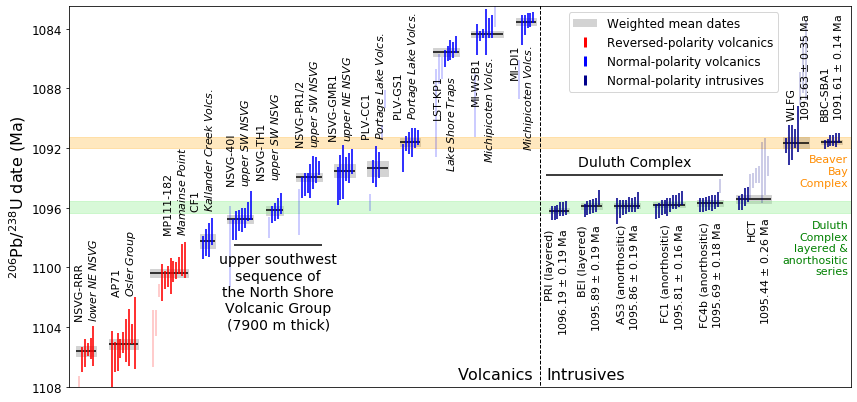

In [24]:
fig, ax, x_positions = plot_dates(MCR_geochron.U_Pb_zircon_dates, MCR_geochron.U_Pb_zircon_2sigmas, 
                                  MCR_geochron.U_Pb_zircon_include, 
                                  MCR_geochron.U_Pb_sample_mean, MCR_geochron.U_Pb_sample_2sigma, 
                                  colors, labels, legend=False, figsize=(14,7), lineweight=2)

max_x_value = 244
ax.set_xlim(0,max_x_value)
ax.set_xticks([])
ax.set_yticks(np.arange(1084,1110,4))
ax.set_yticklabels(np.arange(1084,1110,4),fontsize=12)
ax.yaxis.label.set_size(16)
ax.set_ylim(1108,1082.5)

ax.text(x_positions[0]+1,1105.60-2,'NSVG-RRR \n$\mathit{lower\;NE\;NSVG}$',size='11',horizontalalignment='right',
         verticalalignment='bottom',multialignment='left',rotation=90)
ax.text(x_positions[1],1105.15-3.25,'AP71 \n$\mathit{Osler\;Group}$',size='11',horizontalalignment='right',
        verticalalignment='bottom',multialignment='left',rotation=90)
ax.text(x_positions[2],1100.36-2.5,'MP111-182 \n$\mathit{Mamainse\;Point}$',size='11',horizontalalignment='right',
        verticalalignment='bottom',multialignment='left',rotation=90)
ax.text(x_positions[3],1098.24-2,'CF1 \n$\mathit{Kallander\;Creek\;Volcs.}$',size='11',horizontalalignment='right',
        verticalalignment='bottom',multialignment='left',rotation=90)
ax.text(x_positions[4],1096.75-2.2,'NSVG-40I \n$\mathit{upper\;SW\;NSVG}$',size='11',horizontalalignment='right',
        verticalalignment='bottom',multialignment='left',rotation=90)
ax.text(x_positions[5],1096.18-2,'NSVG-TH1 \n$\mathit{upper\;SW\;NSVG}$',size='11',horizontalalignment='right',
        verticalalignment='bottom',multialignment='left',rotation=90)
ax.text(x_positions[6],1093.94-2,'NSVG-PR1/2 \n$\mathit{upper\;SW\;NSVG}$',size='11',horizontalalignment='right',
        verticalalignment='bottom',multialignment='left',rotation=90)
ax.text(x_positions[7],1093.52-2,'NSVG-GMR1 \n$\mathit{upper\;NE\;NSVG}$',size='11',horizontalalignment='right',
        verticalalignment='bottom',multialignment='left',rotation=90)
ax.text(x_positions[8],1093.37-2,'PLV-CC1 \n$\mathit{Portage\;Lake\;Volcs.}$',size='11',horizontalalignment='right',
        verticalalignment='bottom',multialignment='left',rotation=90)
ax.text(x_positions[9],1091.59-1.5,'PLV-GS1 \n$\mathit{Portage\;Lake\;Volcs.}$',size='11',horizontalalignment='right',
        verticalalignment='bottom',multialignment='left',rotation=90)
ax.text(x_positions[10],1085.57+1.5,'LST-KP1\n$\mathit{Lake\;Shore\;Traps}$',size='11',horizontalalignment='right',
        verticalalignment='top',multialignment='right',rotation=90)
ax.text(x_positions[11]-2,MI_WSB1_mean+1.5,'MI-WSB1\n$\mathit{Michipicoten\;Volcs.}$',size='11',horizontalalignment='right',
        verticalalignment='top',multialignment='right',rotation=90)
ax.text(x_positions[12],1083.52+1.5,'MI-DI1\n$\mathit{Michipicoten\;Volcs.}$',size='11',horizontalalignment='right',
        verticalalignment='top',multialignment='right',rotation=90)

ax.text(x_positions[13],1096.19+1.2,'PRI (layered)\n1096.19 $\pm$ 0.19 Ma',size='11',horizontalalignment='right',
        verticalalignment='top',multialignment='right',rotation=90)
ax.text(x_positions[14],1095.89+1.2,'BEI (layered)\n1095.89 $\pm$ 0.19 Ma',size='11',horizontalalignment='right',
        verticalalignment='top',multialignment='right',rotation=90)
ax.text(x_positions[15],1095.86+1.2,'AS3 (anorthositic)\n1095.86 $\pm$ 0.19 Ma',size='11',horizontalalignment='right',
        verticalalignment='top',multialignment='right',rotation=90)
ax.text(x_positions[16],1095.81+1.2,'FC1 (anorthositic)\n1095.81 $\pm$ 0.16 Ma',size='11',horizontalalignment='right',
        verticalalignment='top',multialignment='right',rotation=90)
ax.text(x_positions[17],1095.71+1.2,'FC4b (anorthositic)\n1095.69 $\pm$ 0.18 Ma',size='11',horizontalalignment='right',
        verticalalignment='top',multialignment='right',rotation=90)
ax.text(x_positions[18],1095.44+1.2,'HCT\n1095.44 $\pm$ 0.26 Ma',size='11',horizontalalignment='right',
        verticalalignment='top',multialignment='right',rotation=90)
ax.text(x_positions[19]+0.5,1091.63-1.5,'WLFG \n1091.63 $\pm$ 0.35 Ma',size='11',horizontalalignment='right',
        verticalalignment='bottom',multialignment='left',rotation=90)
ax.text(x_positions[20]+0.5,1091.61-1.5,'BBC-SBA1\n1091.61 $\pm$ 0.14 Ma',size='11',horizontalalignment='right',
        verticalalignment='bottom',multialignment='left',rotation=90)

rectangle = matplotlib.patches.Rectangle((0,1095.71 - 0.17),300, (1096.19 + 0.19)-(1095.71 - 0.17), color='lightgreen',alpha=0.35)
ax.add_patch(rectangle)
ax.text(max_x_value-0.75, 1096.19 + 0.19 + 0.45, 'Duluth\nComplex\nlayered &\nanorthositic\nseries', color='green' ,size='11',
        verticalalignment='top',horizontalalignment='right')

rectangle = matplotlib.patches.Rectangle((0,1091.63 - 0.35),300, (1091.63 + 0.35)-(1091.63 - 0.35), color='orange',alpha=0.25)
ax.add_patch(rectangle)
ax.text(max_x_value-0.75, 1091.63 + 0.35 + 0.45, 'Beaver\nBay\nComplex', color='darkorange' ,size='11',
        verticalalignment='top', horizontalalignment='right')

ext_int_split = 147
plt.vlines(ext_int_split,1110,1000,linewidths=1,linestyle='--')
plt.text(ext_int_split-2,1107.5,'Volcanics',horizontalalignment='right',fontsize=16)
plt.text(ext_int_split+2,1107.5,'Intrusives',horizontalalignment='left',fontsize=16)

plt.hlines(1098.5,x_positions[3]+6,x_positions[6])
plt.text((x_positions[3]+6+x_positions[6])/2,1099,'upper southwest\nsequence of\nthe North Shore\nVolcanic Group\n(7900 m thick)',verticalalignment='top',
         horizontalalignment='center',fontsize=14)

plt.hlines(1093.8,x_positions[12]+3,x_positions[17])
plt.text((x_positions[12]+3+x_positions[17])/2,1093.2,'Duluth Complex',horizontalalignment='center',fontsize=14)

legend_elements = [Patch(facecolor='lightgrey', edgecolor=None,
                         label='Weighted mean dates'),
                   Line2D([], [],  marker='|', linestyle='None', color='red', label='Reversed-polarity volcanics',
                          markerfacecolor='k', markersize=10, markeredgewidth=3),
                   Line2D([], [],  marker='|', linestyle='None', color='blue', label='Normal-polarity volcanics',
                          markerfacecolor='k', markersize=10, markeredgewidth=3),
                   Line2D([], [],  marker='|', linestyle='None', color='darkblue', label='Normal-polarity intrusives',
                          markerfacecolor='k', markersize=10, markeredgewidth=3)]

plt.legend(handles=legend_elements, loc='upper right',
           bbox_to_anchor=(.915,1), fancybox=True, fontsize = 12)

plt.savefig('../manuscript/figures/MCR_dates.pdf',bbox_inches='tight')
plt.show(fig)

## Comparison between dates

Here we take two approaches to estimate the duration between dates. One is to linearly propagate the 2sigma uncertainty `diff_uncertainty = np.sqrt(date1_2sigma**2 + date2_2sigma**2)`. The other is to do a Monte Carlo simulation where dates are randomly sampled from normal distribution associated with the two dates and the duration between the samples is determined. If the difference includes zero, we consider the dates to be indistinguishable from one another. Both of these approaches are accomplished using the ```age_diff``` function that is defined below.

In [25]:
def age_diff(date1,date1_2sigma,date1_label,date2,date2_2sigma,date2_label,nMC=1000000,date_axis_length=1.2):
    
    diff = date1 - date2
    diff_uncertainty = np.sqrt(date1_2sigma**2 + date2_2sigma**2)
    print('difference between ' + str(date1_label) + ' and ' + str(date2_label) + ' = ' + str(np.round(diff,decimals=3)))
    print('linearly propagated 2σ uncertainty of the difference = ' + str(np.round(diff_uncertainty,decimals=3)))

    date1_mc = np.random.normal(date1,date1_2sigma/2,nMC)
    date2_mc = np.random.normal(date2,date2_2sigma/2,nMC)
    diff_mc = date1_mc-date2_mc
    diff_median = np.median(diff_mc)
    diff_percent97_5 = np.percentile(diff_mc,97.5)
    diff_percent2_5 = np.percentile(diff_mc,2.5)
    
    print('\n97.5 percentile of difference in Monte Carlo simulations = ' + str(np.round(diff_percent97_5,decimals=3)))
    print('2.5 percentile of difference in Monte Carlo simulations = ' + str(np.round(diff_percent2_5,decimals=3)))
    
    ax1 = plt.subplot(2,1,1)
    ax1.hist(date1_mc, histtype='step',bins=100,label=date1_label)
    ax1.hist(date2_mc, histtype='step',bins=100,label=date2_label)
    ax1.set_xlabel('age (Ma)')
    ax1.set_xlim((date1+date2)/2 + date_axis_length/2, (date1+date2)/2 - date_axis_length/2)
    ax1.legend()
    
    ax2 = plt.subplot(2,1,2)
    n_diff, x_diff, diff_hist = ax2.hist(diff_mc,bins=100,color='C3',label='duration')
    ax2.vlines(diff_median,0,np.max(n_diff)*1.1,color='black')
    ax2.vlines(diff_percent97_5,0,np.max(n_diff)*1.1,color='black',linestyle='--')
    ax2.vlines(diff_percent2_5,0,np.max(n_diff)*1.1,color='black',linestyle='--')
    ax2.set_xlabel('age difference (Ma)')
    ax2.set_xlim(diff_median - date_axis_length/2, diff_median + date_axis_length/2)
    ax2.set_ylim(0,np.max(n_diff)*1.1)
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

difference between FC1 (Ibanez and Tissot, 2019) and FC1 = 0.164
linearly propagated 2σ uncertainty of the difference = 0.271

97.5 percentile of difference in Monte Carlo simulations = 0.429
2.5 percentile of difference in Monte Carlo simulations = -0.102


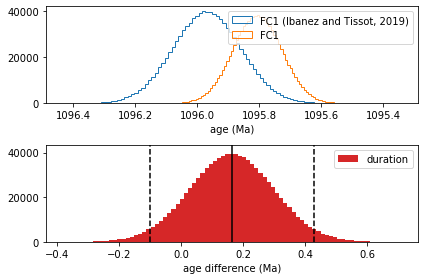

In [26]:
FC1_mean_Ibanez = 1095.97
FC1_2sigma_Ibanez = 0.22

age_diff(FC1_mean_Ibanez,FC1_2sigma_Ibanez,'FC1 (Ibanez and Tissot, 2019)',FC1_mean,FC1_2sigma,'FC1')

difference between FC1 and FC4b = 0.117
linearly propagated 2σ uncertainty of the difference = 0.239

97.5 percentile of difference in Monte Carlo simulations = 0.351
2.5 percentile of difference in Monte Carlo simulations = -0.117


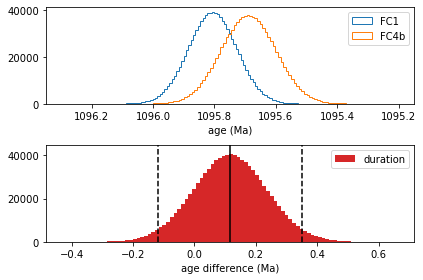

In [27]:
age_diff(FC1_mean,FC1_2sigma,'FC1',FC4b_mean,FC4b_2sigma,'FC4b')

difference between AS3 and FC1 = 0.056
linearly propagated 2σ uncertainty of the difference = 0.245

97.5 percentile of difference in Monte Carlo simulations = 0.296
2.5 percentile of difference in Monte Carlo simulations = -0.184


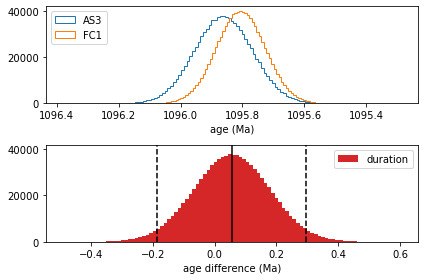

In [28]:
age_diff(AS3_mean,AS3_2sigma,'AS3',FC1_mean,FC1_2sigma,'FC1')

difference between AS3 and FC4b = 0.172
linearly propagated 2σ uncertainty of the difference = 0.259

97.5 percentile of difference in Monte Carlo simulations = 0.426
2.5 percentile of difference in Monte Carlo simulations = -0.081


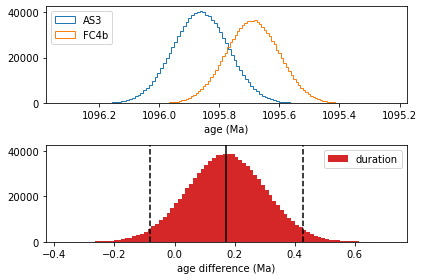

In [29]:
age_diff(AS3_mean,AS3_2sigma,'AS3',FC4b_mean,FC4b_2sigma,'FC4b')

difference between BEI and AS3 = 0.022
linearly propagated 2σ uncertainty of the difference = 0.267

97.5 percentile of difference in Monte Carlo simulations = 0.284
2.5 percentile of difference in Monte Carlo simulations = -0.24


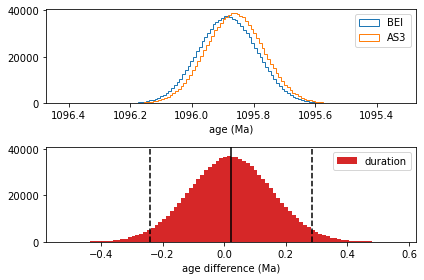

In [30]:
age_diff(BEI_mean,BEI_2sigma,'BEI',AS3_mean,AS3_2sigma,'AS3')

difference between BEI and FC1 = 0.078
linearly propagated 2σ uncertainty of the difference = 0.248

97.5 percentile of difference in Monte Carlo simulations = 0.321
2.5 percentile of difference in Monte Carlo simulations = -0.165


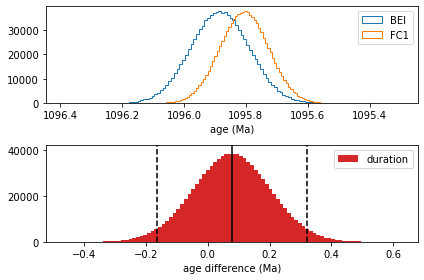

In [31]:
age_diff(BEI_mean,BEI_2sigma,'BEI',FC1_mean,FC1_2sigma,'FC1')

difference between BEI and FC4b = 0.195
linearly propagated 2σ uncertainty of the difference = 0.262

97.5 percentile of difference in Monte Carlo simulations = 0.451
2.5 percentile of difference in Monte Carlo simulations = -0.062


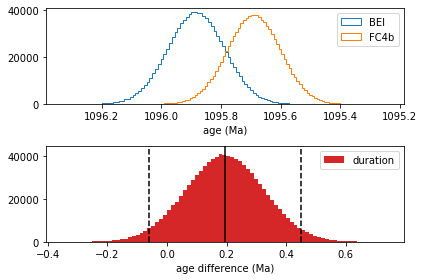

In [32]:
age_diff(BEI_mean,BEI_2sigma,'BEI',FC4b_mean,FC4b_2sigma,'FC4b')

difference between PRI and BEI = 0.31
linearly propagated 2σ uncertainty of the difference = 0.268

97.5 percentile of difference in Monte Carlo simulations = 0.573
2.5 percentile of difference in Monte Carlo simulations = 0.048


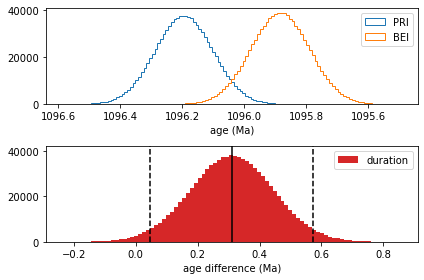

In [33]:
age_diff(PRI_mean,PRI_2sigma,'PRI',BEI_mean,BEI_2sigma,'BEI')

difference between PRI and AS3 = 0.333
linearly propagated 2σ uncertainty of the difference = 0.265

97.5 percentile of difference in Monte Carlo simulations = 0.593
2.5 percentile of difference in Monte Carlo simulations = 0.072


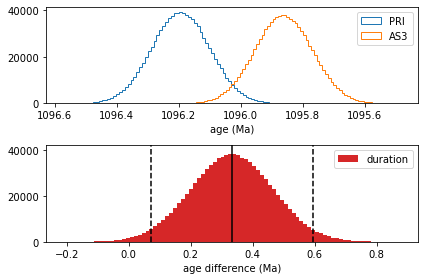

In [34]:
age_diff(PRI_mean,PRI_2sigma,'PRI',AS3_mean,AS3_2sigma,'AS3')

difference between PRI and FC1 = 0.388
linearly propagated 2σ uncertainty of the difference = 0.246

97.5 percentile of difference in Monte Carlo simulations = 0.629
2.5 percentile of difference in Monte Carlo simulations = 0.148


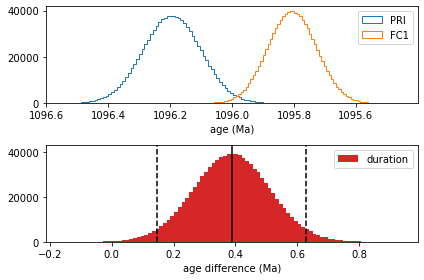

In [35]:
age_diff(PRI_mean,PRI_2sigma,'PRI',FC1_mean,FC1_2sigma,'FC1')

difference between PRI and FC4b = 0.505
linearly propagated 2σ uncertainty of the difference = 0.26

97.5 percentile of difference in Monte Carlo simulations = 0.76
2.5 percentile of difference in Monte Carlo simulations = 0.251


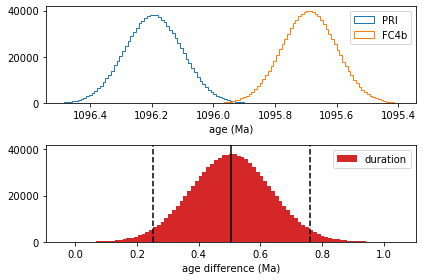

In [36]:
age_diff(PRI_mean,PRI_2sigma,'PRI',FC4b_mean,FC4b_2sigma,'FC4b')

difference between FC4b and HCT = 0.369
linearly propagated 2σ uncertainty of the difference = 0.303

97.5 percentile of difference in Monte Carlo simulations = 0.666
2.5 percentile of difference in Monte Carlo simulations = 0.072


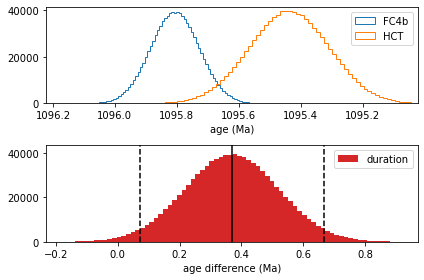

In [37]:
age_diff(FC1_mean,FC1_2sigma,'FC4b',HCT_mean,HCT_2sigma,'HCT')

difference between FC4b and HCT = 0.252
linearly propagated 2σ uncertainty of the difference = 0.314

97.5 percentile of difference in Monte Carlo simulations = 0.56
2.5 percentile of difference in Monte Carlo simulations = -0.056


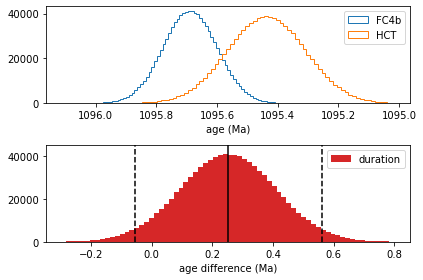

In [38]:
age_diff(FC4b_mean,FC4b_2sigma,'FC4b',HCT_mean,HCT_2sigma,'HCT')

difference between D1_PM93 and PG2_PM93 = 0.7
linearly propagated 2σ uncertainty of the difference = 0.583

97.5 percentile of difference in Monte Carlo simulations = 1.271
2.5 percentile of difference in Monte Carlo simulations = 0.128


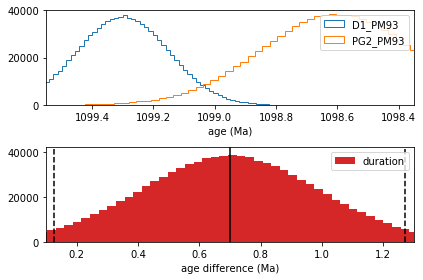

In [39]:
D1_PM93_mean = 1099.3
D1_PM93_2sigma = 0.3

PG2_PM93_mean = 1098.6
PG2_PM93_2sigma = 0.5

age_diff(D1_PM93_mean,D1_PM93_2sigma,'D1_PM93',PG2_PM93_mean,PG2_PM93_2sigma,'PG2_PM93')

difference between D1_PM93 and PG2_PM93 = 0.5
linearly propagated 2σ uncertainty of the difference = 0.707

97.5 percentile of difference in Monte Carlo simulations = 1.193
2.5 percentile of difference in Monte Carlo simulations = -0.194


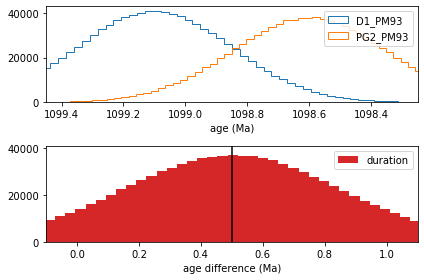

In [40]:
D1_PM93_mean = 1099.1
D1_PM93_2sigma = 0.5

PG2_PM93_mean = 1098.6
PG2_PM93_2sigma = 0.5

age_diff(D1_PM93_mean,D1_PM93_2sigma,'D1_PM93',PG2_PM93_mean,PG2_PM93_2sigma,'PG2_PM93')

# Duluth Complex paleomagnetic data compilation

Beck (1970) published results from intrusive rocks of the Midcontinent Rift in northern Minnesota including the Duluth Complex. The details of the site mean directions, site locations and lithologies are available within Beck's PhD thesis that was published in 1969. These data can be assigned to intrusive units associated with more recent mapping efforts (Miller et al., 2001) and include abundant data from the anorthositic and layered series of the Duluth Complex.

*Beck Jr, M.E., 1970. Paleomagnetism of Keweenawan intrusive rocks, Minnesota. Journal of Geophysical Research, 75(26), pp. 4985-4996.*

The Beck (1970) study utilized blanket alternating field demagnetization steps of 7.5, 15 and 30 mT and chose to use the directions associated with the step where there was the highest concentration of directions. Given that Midcontinent Rift magnetizations are typically single-component, it is likely that this approach yielded acceptable site mean directions.

## Import and plot the Beck (1970) sites from the Duluth Complex

In [41]:
Beck1969a_sites = pd.read_csv('../data/pmag_compiled/Beck1969a_sites.txt',sep='\t',header=1)
Beck_Anorthositic_series = Beck1969a_sites[Beck1969a_sites['location'] == 'Anorthositic series']
Beck_Layered_series = Beck1969a_sites[Beck1969a_sites['location'] == 'Layered series']

In [42]:
from cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io import img_tiles
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
lakes_10m = cfeature.NaturalEarthFeature('physical', 'lakes', '10m',
                                        edgecolor='face',
                                        facecolor=cfeature.COLORS['water'])
lakes_50m = cfeature.NaturalEarthFeature('physical', 'lakes', '50m',
                                        edgecolor='face',
                                        facecolor=cfeature.COLORS['water'])
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor=cfeature.COLORS['land'])

states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')

Laurentia_outline = ShapelyFeature(Reader('../data/Laurentia_shape/Laurentia.shp').geometries(),
                                ccrs.PlateCarree(), facecolor = 'none', edgecolor='black')

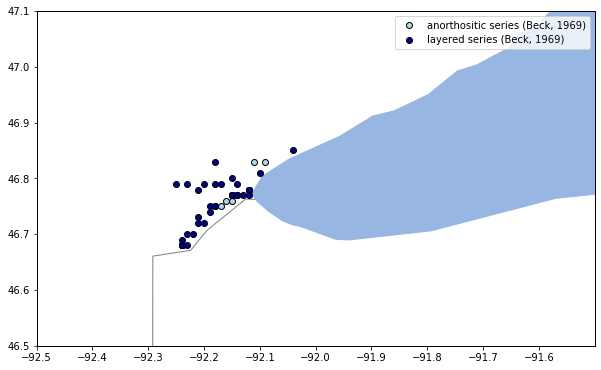

In [43]:
central_lat = 46.75
central_lon = -92
extent = [central_lon-0.5, central_lon+0.5, central_lat-0.25, central_lat+0.25]

plt.figure(1,(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(extent)
plt.scatter(Beck_Anorthositic_series.lon, Beck_Anorthositic_series.lat,transform=ccrs.PlateCarree(),zorder=100,
            color = 'lightblue', edgecolors='black',label='anorthositic series (Beck, 1969)')
plt.scatter(Beck_Layered_series.lon, Beck_Layered_series.lat,transform=ccrs.PlateCarree(),zorder=100,
            color = 'darkblue', edgecolors='black',label='layered series (Beck, 1969)')

ax.coastlines(resolution='10m')
ax.add_feature(states_provinces, edgecolor='gray')
ax.add_feature(lakes_10m)

ax.set_xticks(np.arange(-92.5,-91.6,0.1).tolist(), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(46.5,47.1,0.1).tolist(), crs=ccrs.PlateCarree())
plt.legend()
plt.show()

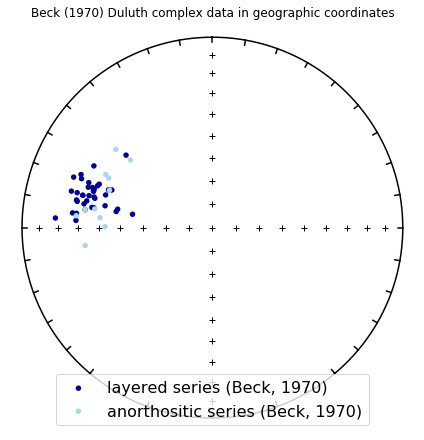

In [44]:
plt.figure(figsize=(6,6))
ipmag.plot_net()
ipmag.plot_di(Beck_Layered_series['dir_dec'].tolist(),
              Beck_Layered_series['dir_inc'].tolist(),color='darkblue',
              label='layered series (Beck, 1970)',markersize=30)
ipmag.plot_di(Beck_Anorthositic_series['dir_dec'].tolist(),
              Beck_Anorthositic_series['dir_inc'].tolist(),color='lightblue',
              label='anorthositic series (Beck, 1970)',markersize=30)
plt.legend(loc=8,fontsize=16)
plt.title('Beck (1970) Duluth complex data in geographic coordinates')
plt.show()

## Conduct common mean tests between the layered series and anorthositic series data

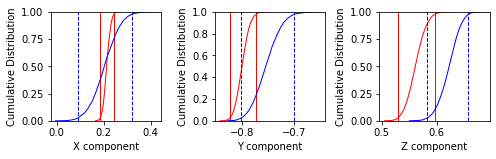

Results of Watson V test: 

Watson's V:           2.1
Critical value of V:  6.9
"Pass": Since V is less than Vcrit, the null hypothesis
that the two populations are drawn from distributions
that share a common mean direction can not be rejected.

M&M1990 classification:

Angle between data set means: 4.4
Critical angle for M&M1990:   8.0
The McFadden and McElhinny (1990) classification for
this test is: 'B'


(1, 4.389215518800642, 7.954778765806024)

In [45]:
Beck_Layered_block = ipmag.make_di_block(Beck_Layered_series['dir_dec'].tolist(),
                                         Beck_Layered_series['dir_inc'].tolist())
Beck_Anortho_block = ipmag.make_di_block(Beck_Anorthositic_series['dir_dec'].tolist(),
                                         Beck_Anorthositic_series['dir_inc'].tolist())
ipmag.common_mean_bootstrap(Beck_Layered_block,Beck_Anortho_block)
ipmag.common_mean_watson(Beck_Layered_block,Beck_Anortho_block)

## M181 Duluth Heights orientation data

In [46]:
# import structural measurements from published map data
Duluth_Heights_structural_data = pd.read_csv('../data/intrusive_orientations/Duluth_Heights_orientations.csv',sep=',')
Duluth_Heights = Duluth_Heights_structural_data[(Duluth_Heights_structural_data.STRUCTURE == 'IL') | (Duluth_Heights_structural_data.STRUCTURE == 'IM') 
                                              | (Duluth_Heights_structural_data.STRUCTURE == 'IU') | (Duluth_Heights_structural_data.STRUCTURE == 'IT')]

In [47]:
Duluth_Heights = Duluth_Heights[Duluth_Heights.Y < 5183000]
Duluth_Heights = Duluth_Heights[Duluth_Heights['DIP_PLUNGE']<35]

In [48]:
Duluth_Heights['strike'] = Duluth_Heights['DIPD_TREND'] - 90
Duluth_Heights['pole_trend'] = Duluth_Heights['DIPD_TREND'] - 180
Duluth_Heights['pole_plunge'] = 90 - Duluth_Heights['DIP_PLUNGE']
mean_plane_pole = ipmag.fisher_mean(Duluth_Heights['pole_trend'].tolist(),Duluth_Heights['pole_plunge'].tolist())
mean_strike = mean_plane_pole['dec'] + 90
mean_dip = 90 - mean_plane_pole['inc']
print(mean_strike, mean_dip)

367.9513341883158 16.344796403566036


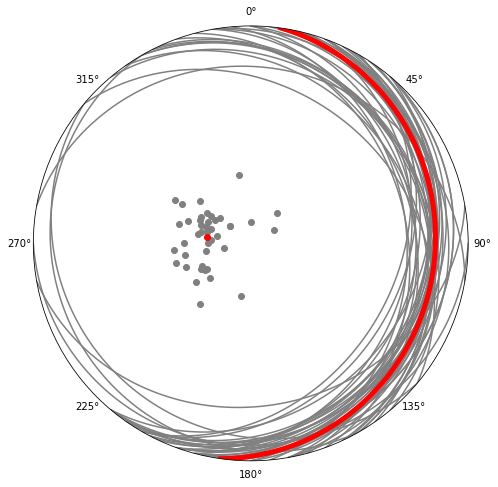

In [49]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')
ax.plane(Duluth_Heights['strike'],Duluth_Heights['DIP_PLUNGE'],color='grey')
ax.plane(mean_strike,mean_dip,color='red',linewidth=5)
ax.pole(Duluth_Heights['strike'],Duluth_Heights['DIP_PLUNGE'],color='grey')
ax.pole(mean_strike,mean_dip,color='red')

plt.show()

## Plotting M183 West Duluth map orientations

Here we are plotting the igneous layering, igneous modal or texture layering

In [50]:
# import structural measurements from published map data
West_Duluth_structural_data = pd.read_csv('../data/intrusive_orientations/West_Duluth_orientations.csv',sep=',')
West_Duluth = West_Duluth_structural_data[(West_Duluth_structural_data.STRUCTURE == 'IL') | (West_Duluth_structural_data.STRUCTURE == 'IM') 
                                              | (West_Duluth_structural_data.STRUCTURE == 'IU') | (West_Duluth_structural_data.STRUCTURE == 'IT')]
West_Duluth

,Y,X,ValueId,PolyId,AREA,PERIMETER,WDUL_STRPT,WDUL_STR_1,TYPE,GCM_CODE,GEOC_SRC,GEOC_DATE,FIELD_STA,MEAS_ID,MEAS_DATE,GEOL_1,GEOL_2,REFRNCE,STRUCTURE,STRUC_TYPE,DIPD_TREND,DIP_PLUNGE,MRR_RELIAB,N_MEAS,SYM_CODE,DISPLAY,AVANGLE
9,5.169831e+06,558799.132850,10,0,0.0,0.0,10,10,ST,A,MGS,20080615,NaN,MD739.5,20031007,JDM,NaN,NB:MD4/FM:WD5585E/51705N,IM,P,80,45,NaN,1,73,24000,280
10,5.169874e+06,558554.535103,11,0,0.0,0.0,11,11,ST,A,MGS,20080615,NaN,MD587.00.2,19971015,JDM,NaN,NB:MD4/FM:223B.SW2,IM,P,59,24,NaN,1,73,24000,301
11,5.169972e+06,558275.324686,12,0,0.0,0.0,12,12,ST,A,MGS,20080615,NaN,MD591.00.2,19971015,JDM,NaN,NB:MD4/FM:223B.SW2,IM,P,70,34,NaN,0,73,24000,290
12,5.170077e+06,558949.574927,13,0,0.0,0.0,13,13,ST,A,MGS,20080615,NaN,MD736.3,20031007,JDM,NaN,NB:MD4/FM:WD5585E/51705N,IM,P,75,49,NaN,1,73,24000,285
13,5.170094e+06,558419.712396,14,0,0.0,0.0,14,14,ST,A,MGS,20080615,NaN,MD555.00.1,19941021,JDM,NaN,NB:DM3/FM:223B.SW2,IT,P,63,37,NaN,1,73,24000,297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,5.177305e+06,562249.038259,183,0,0.0,0.0,183,183,ST,A,MGS,20080615,NaN,MD205.00.2,19920819,JDM,NaN,NB:DM2/FM:223B.NC1,IT,P,65,35,NaN,1,73,24000,295
183,5.177331e+06,561145.444574,184,0,0.0,0.0,184,184,ST,A,MGS,20080615,NaN,MD189.00.1,19920814,JDM,NaN,NB:DM2/FM:223B.NC1,IL,P,90,10,NaN,1,103,24000,270
184,5.177455e+06,561363.004356,185,0,0.0,0.0,185,185,ST,A,MGS,20080615,NaN,MD648.1,19971021,JDM,NaN,NB:MD4/FM:223B.NC,IM,P,128,15,NaN,1,73,12000,232
185,5.177605e+06,562167.927481,186,0,0.0,0.0,186,186,ST,A,MGS,20080615,NaN,MD202.00.1,19920819,JDM,NaN,NB:DM2/FM:223B.NC1,IL,P,129,19,NaN,1,103,24000,231


In [51]:
West_Duluth = West_Duluth[West_Duluth['DIP_PLUNGE']<35]

In [52]:
West_Duluth['strike'] = West_Duluth['DIPD_TREND'] - 90
West_Duluth['pole_trend'] = West_Duluth['DIPD_TREND'] - 180
West_Duluth['pole_plunge'] = 90 - West_Duluth['DIP_PLUNGE']
mean_plane_pole = ipmag.fisher_mean(West_Duluth['pole_trend'].tolist(),West_Duluth['pole_plunge'].tolist())
mean_strike = mean_plane_pole['dec'] + 90
mean_dip = 90 - mean_plane_pole['inc']
print(mean_strike, mean_dip)

351.92633364731483 18.271165297678067


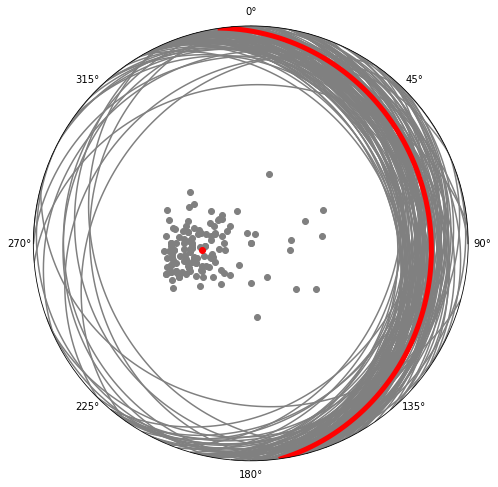

In [53]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')
ax.plane(West_Duluth['strike'],West_Duluth['DIP_PLUNGE'],color='grey')
ax.plane(mean_strike,mean_dip,color='red',linewidth=5)
ax.pole(West_Duluth['strike'],West_Duluth['DIP_PLUNGE'],color='grey')
ax.pole(mean_strike,mean_dip,color='red')

plt.show()

## Plotting M182 Duluth map orientations

Here we are plotting orientations from North Shore Volcanic Group lavas overlying the Duluth Complex to compare the mean orientation to that of the igneous foliations compiled above. They show good consistency in the overall orientation. 

In [54]:
# import structural measurements from published map data
Duluth_structural_data = pd.read_csv('../data/intrusive_orientations/Duluth_orientations.csv',sep=',')
Duluth = Duluth_structural_data[(Duluth_structural_data.STRUCTURE == 'VF') | (Duluth_structural_data.STRUCTURE == 'SB') 
                                | (Duluth_structural_data.STRUCTURE == 'VC') | (Duluth_structural_data.STRUCTURE == 'VB') 
                                | (Duluth_structural_data.STRUCTURE == 'JJ')]

There are a few steep outliers (both in dip direction and dip that can be filtered out.

In [55]:
Duluth = Duluth[Duluth['DIP_PLUNGE']<35]

In [56]:
Duluth['strike'] = Duluth['DIPD_TREND'] - 90
Duluth['pole_trend'] = Duluth['DIPD_TREND'] - 180
Duluth['pole_plunge'] = 90 - Duluth['DIP_PLUNGE']
mean_plane_pole = ipmag.fisher_mean(Duluth['pole_trend'].tolist(),Duluth['pole_plunge'].tolist())
mean_strike = mean_plane_pole['dec'] + 90
mean_dip = 90 - mean_plane_pole['inc']
print(mean_strike, mean_dip)

369.7403758826295 18.386093074433518


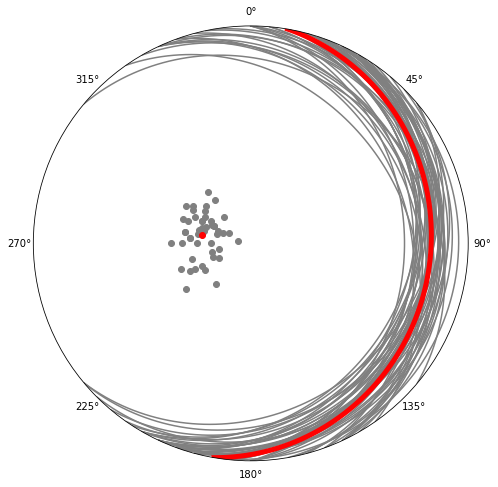

In [57]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')
ax.plane(Duluth['strike'],Duluth['DIP_PLUNGE'],color='grey')
ax.plane(mean_strike,mean_dip,color='red',linewidth=5)
ax.pole(Duluth['strike'],Duluth['DIP_PLUNGE'],color='grey')
ax.pole(mean_strike,mean_dip,color='red')

plt.show()

## Tilt correct the data

We can combine the structural measurements from West Duluth and Duluth Heights to calculate an overall mean direction that can be used to tilt correct the paleomagnetic site data.

In [58]:
Duluth_mean_plane_pole = ipmag.fisher_mean(West_Duluth['pole_trend'].tolist()+Duluth_Heights['pole_trend'].tolist(),
                                    West_Duluth['pole_plunge'].tolist()+Duluth_Heights['pole_plunge'].tolist())
Duluth_mean_strike = Duluth_mean_plane_pole['dec'] + 90
Duluth_mean_dip = 90 - Duluth_mean_plane_pole['inc']
print(Duluth_mean_strike, Duluth_mean_dip)

355.488656622132 17.69040648835825


In [59]:
tilt_correction_dd = Duluth_mean_strike + 90
tilt_correction_dip = Duluth_mean_dip

Beck_Anorthositic_series['dec_tc'] = [pmag.dotilt(Beck_Anorthositic_series['dir_dec'].tolist()[i], Beck_Anorthositic_series['dir_inc'].tolist()[i], tilt_correction_dd, tilt_correction_dip)[0] 
                                      for i in range(len(Beck_Anorthositic_series['dir_dec']))]
Beck_Anorthositic_series['inc_tc'] = [pmag.dotilt(Beck_Anorthositic_series['dir_dec'].tolist()[i], Beck_Anorthositic_series['dir_inc'].tolist()[i], tilt_correction_dd, tilt_correction_dip)[1] 
                                      for i in range(len(Beck_Anorthositic_series['dir_dec']))]
Beck_Layered_series['dec_tc'] = [pmag.dotilt(Beck_Layered_series['dir_dec'].tolist()[i], Beck_Layered_series['dir_inc'].tolist()[i], tilt_correction_dd, tilt_correction_dip)[0] 
                                      for i in range(len(Beck_Layered_series['dir_dec']))]
Beck_Layered_series['inc_tc'] = [pmag.dotilt(Beck_Layered_series['dir_dec'].tolist()[i], Beck_Layered_series['dir_inc'].tolist()[i], tilt_correction_dd, tilt_correction_dip)[1] 
                                      for i in range(len(Beck_Layered_series['dir_dec']))]

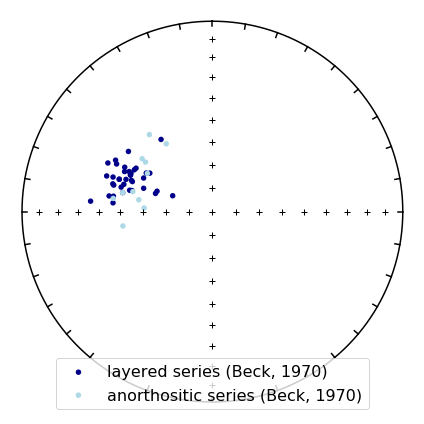

In [60]:
plt.figure(figsize=(6,6))
ipmag.plot_net()
ipmag.plot_di(Beck_Layered_series['dec_tc'].tolist(),
              Beck_Layered_series['inc_tc'].tolist(),color='darkblue',
              label='layered series (Beck, 1970)',markersize=30)
ipmag.plot_di(Beck_Anorthositic_series['dec_tc'].tolist(),
              Beck_Anorthositic_series['inc_tc'].tolist(),color='lightblue',
              label='anorthositic series (Beck, 1970)',markersize=30)
plt.legend(loc=8,fontsize=16)
# plt.savefig('./code_output/Beck_site_directions.pdf')
plt.show()

In [61]:
Beck_Anorthositic_series_tilt_corrected = ipmag.vgp_calc(Beck_Anorthositic_series, tilt_correction='yes',
    site_lon='lon',
    site_lat='lat',
    dec_is='dir_dec',
    inc_is='dir_inc',
    dec_tc='dec_tc',
    inc_tc='inc_tc',
)

Beck_Layered_series_tilt_corrected = ipmag.vgp_calc(Beck_Layered_series, tilt_correction='yes',
    site_lon='lon',
    site_lat='lat',
    dec_is='dir_dec',
    inc_is='dir_inc',
    dec_tc='dec_tc',
    inc_tc='inc_tc',
)

In [62]:
Beck_Layered_series_tilt_corrected['dir_alpha95'] = 140/np.sqrt(Beck_Layered_series_tilt_corrected['dir_k']*Beck_Layered_series_tilt_corrected['dir_n_specimens'])
Beck_Layered_filtered = Beck_Layered_series_tilt_corrected[Beck_Layered_series_tilt_corrected['dir_alpha95']<15]

Beck_Anorthositic_series_tilt_corrected['dir_alpha95'] = 140/np.sqrt(Beck_Anorthositic_series_tilt_corrected['dir_k']*Beck_Anorthositic_series_tilt_corrected['dir_n_specimens'])
Beck_Anorthositic_filtered = Beck_Anorthositic_series_tilt_corrected[Beck_Anorthositic_series_tilt_corrected['dir_alpha95']<15]

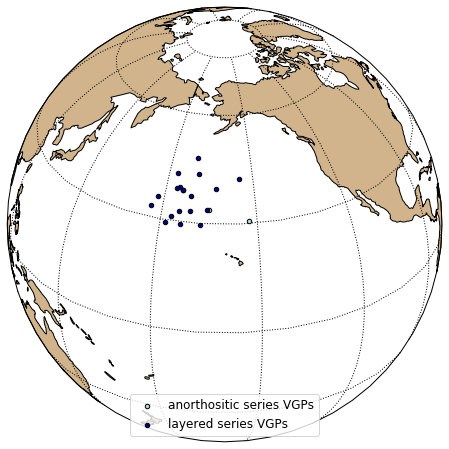

In [63]:
map_axis = ipmag.make_orthographic_map(central_longitude=200,central_latitude=30)
ipmag.plot_vgp(map_axis,vgp_lon=Beck_Anorthositic_filtered.vgp_lon,
               vgp_lat=Beck_Anorthositic_filtered.vgp_lat,color='lightblue',
               label='anorthositic series VGPs')
ipmag.plot_vgp(map_axis,vgp_lon=Beck_Layered_filtered.vgp_lon,
               vgp_lat=Beck_Layered_filtered.vgp_lat,color='darkblue',
               label='layered series VGPs')

plt.legend(loc=8, scatterpoints=1, fontsize=12)
plt.show()

## New data from the anorthositic series

Here we plot the paleomagnetic data from sites FC1 and FC4 of the anorthositic series from where the geochronology samples were collected.

There are not structural measurements from within the anorthositic series in this locality that can be used for tilt-correction. However, there are measurements higher in the intrusive pile such as in the Houghtaling Creek Troctolite. Given the large-scale regional tilt, these measurements can be used for the FC sites.

In [64]:
# import structural measurements from published map data
HCT_orientations = pd.read_csv('../data/intrusive_orientations/HCT_WLFG_geochron_orientations.csv',sep=',')
HCT_orientations = HCT_orientations[(HCT_orientations.STRUCTURE == 'IL') | (HCT_orientations.STRUCTURE == 'IM') | (HCT_orientations.STRUCTURE == 'IU')]
HCT_orientations = HCT_orientations[HCT_orientations['DIP_PLUNGE']<25]
HCT_orientations = HCT_orientations[HCT_orientations['DIPD_TREND']<220]

In [65]:
HCT_orientations['strike'] = HCT_orientations['DIPD_TREND'] - 90
HCT_orientations['pole_trend'] = HCT_orientations['DIPD_TREND'] - 180
HCT_orientations['pole_plunge'] = 90 - HCT_orientations['DIP_PLUNGE']
HCT_mean_plane_pole = ipmag.fisher_mean(HCT_orientations['pole_trend'].tolist(),HCT_orientations['pole_plunge'].tolist())
HCT_mean_strike = (HCT_mean_plane_pole['dec'] + 90)%360
HCT_mean_dip = 90 - HCT_mean_plane_pole['inc']
print(HCT_mean_strike, HCT_mean_dip)

48.970981220873455 12.601368067405502


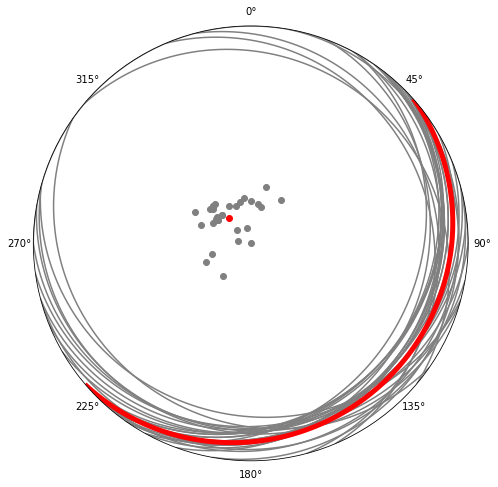

In [66]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')
ax.plane(HCT_orientations['strike'],HCT_orientations['DIP_PLUNGE'],color='grey')
ax.plane(HCT_mean_strike,HCT_mean_dip,color='red',linewidth=5)
ax.pole(HCT_orientations['strike'],HCT_orientations['DIP_PLUNGE'],color='grey')
ax.pole(HCT_mean_strike,HCT_mean_dip,color='red')

plt.show()

## New paleomagnetic data

In [67]:
# load MagIC table
North_Shore = pd.read_csv('../data/pmag_new/sites.txt', sep='\t',header=1)

# filter by tilt correction and component 
North_Shore = North_Shore[North_Shore['dir_tilt_correction'] == 0]
North_Shore = North_Shore[(North_Shore['dir_comp_name'] == 'mc') | (North_Shore['dir_comp_name'] == 'mt')]

#define the tilt correction
FC_dip_direction = HCT_mean_strike + 90
FC_dip = HCT_mean_dip

# do the tilt correction
North_Shore['dec_tc'] = [pmag.dotilt(North_Shore['dir_dec'].tolist()[i], North_Shore['dir_inc'].tolist()[i], 
                                                  FC_dip_direction, FC_dip)[0] for i in range(len(North_Shore['dir_dec']))]

North_Shore['inc_tc'] = [pmag.dotilt(North_Shore['dir_dec'].tolist()[i], North_Shore['dir_inc'].tolist()[i], 
                                                  FC_dip_direction, FC_dip)[1] for i in range(len(North_Shore['dir_dec']))]

North_Shore = ipmag.vgp_calc(North_Shore, tilt_correction='yes',
    site_lon='lon',
    site_lat='lat',
    dec_is='dir_dec',
    inc_is='dir_inc',
    dec_tc='dec_tc',
    inc_tc='inc_tc',
)

# split out by site/method
FC1_AF = North_Shore[(North_Shore['site'].str.contains('FC1')) & (North_Shore['dir_comp_name'] == 'mc')]
FC4_AF = North_Shore[(North_Shore['site'].str.contains('FC4')) & (North_Shore['dir_comp_name'] == 'mc')]
FC1_thermal = North_Shore[(North_Shore['site'].str.contains('FC1')) & (North_Shore['dir_comp_name'] == 'mt')]
HCT_AF = North_Shore[(North_Shore['site'].str.contains('HCT')) & (North_Shore['dir_comp_name'] == 'mc')]
HCT_thermal = North_Shore[(North_Shore['site'].str.contains('HCT')) & (North_Shore['dir_comp_name'] == 'mt')]


HCT_thermal

,site,location,samples,specimens,dir_alpha95,dir_comp_name,dir_dec,dir_inc,dir_k,dir_n_samples,dir_n_specimens,dir_n_specimens_lines,dir_n_specimens_planes,dir_polarity,dir_r,dir_tilt_correction,lat,lon,analysts,criteria,software_packages,citations,method_codes,result_quality,dec_tc,inc_tc,paleolatitude,vgp_lat,vgp_lon,vgp_lat_rev,vgp_lon_rev
10,HCT1,North,HCT1-1:HCT1-2:HCT1-3:HCT1-5:HCT1-6:HCT1-8,HCT1-1b:HCT1-2b:HCT1-3b:HCT1-5b:HCT1-6b:HCT1-8b,5.6,mt,285.7,45.3,144,6,6,6,0,NaN,5.9652,0,47.6008,-91.1495,Yiming Zhang,ACCEPT,pmagpy-4.2.25: demag_gui.v.3.0,This study,LP-DIR-T:DE-BFL:DA-DIR-GEO:LP-DC4:DE-FM,g,276.317559,55.283566,35.816076,29.492268,201.037076,-29.492268,21.037076


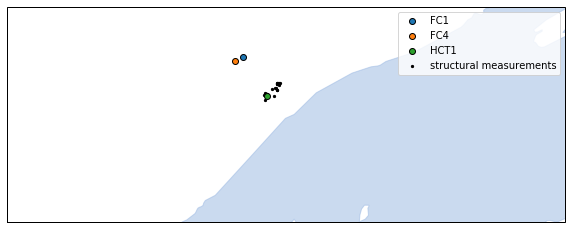

In [68]:
from pyproj import Proj

myProj = Proj("+proj=utm +zone=15N, +ellps=WGS84 +datum=WGS84 +units=m +no_defs")
lon, lat = myProj(HCT_orientations['UTME'].values, HCT_orientations['UTMN'].values, inverse=True)

central_lat = 48
central_lon = -90
extent = [central_lon-3, central_lon+1, central_lat-1, central_lat+0]

plt.figure(1,(10,10))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_longitude=-90, central_latitude=50))
ax.set_extent(extent)

plt.scatter(FC1_AF.lon.tolist()[0], FC1_AF.lat.tolist()[0],transform=ccrs.PlateCarree(),zorder=100,color = 'C0', 
            edgecolors='black', label = FC1_AF.site.tolist()[0])
plt.scatter(FC4_AF.lon.tolist()[0], FC4_AF.lat.tolist()[0],transform=ccrs.PlateCarree(),zorder=100,color = 'C1', 
            edgecolors='black', label = FC4_AF.site.tolist()[0])
plt.scatter(HCT_thermal.lon.tolist()[0], HCT_thermal.lat.tolist()[0],transform=ccrs.PlateCarree(),color = 'C2', 
            edgecolors='black', label = HCT_thermal.site.tolist()[0],zorder=1000)
    
plt.scatter(lon.tolist(), lat.tolist(),zorder=100,transform=ccrs.PlateCarree(), color='black', label='structural measurements',s=5)

ax.coastlines(resolution='10m')
ax.add_feature(lakes_10m, alpha=0.5)
plt.legend()
plt.show()

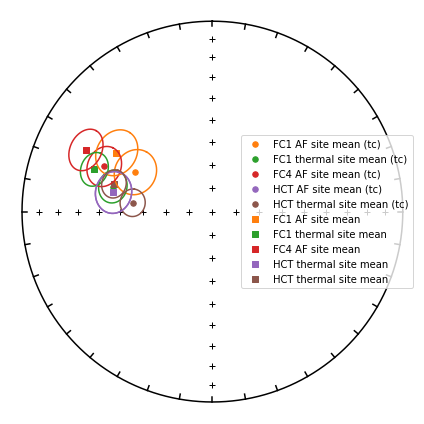

In [69]:
plt.figure(figsize=(6,6))
ipmag.plot_net()

ipmag.plot_di_mean(FC1_AF['dec_tc'].tolist()[0],
              FC1_AF['inc_tc'].tolist()[0], FC1_AF['dir_alpha95'].tolist()[0], color='C1',
              label='FC1 AF site mean (tc)',markersize=30)
ipmag.plot_di_mean(FC1_thermal['dec_tc'].tolist()[0],
              FC1_thermal['inc_tc'].tolist()[0], FC1_thermal['dir_alpha95'].tolist()[0], color='C2',
              label='FC1 thermal site mean (tc)',markersize=30)
ipmag.plot_di_mean(FC4_AF['dec_tc'].tolist()[0],
              FC4_AF['inc_tc'].tolist()[0], FC4_AF['dir_alpha95'].tolist()[0], color='C3',
              label='FC4 AF site mean (tc)',markersize=30)
ipmag.plot_di_mean(HCT_AF['dec_tc'].tolist()[0],
              HCT_AF['inc_tc'].tolist()[0], HCT_AF['dir_alpha95'].tolist()[0], color='C4',
              label='HCT AF site mean (tc)',markersize=30)
ipmag.plot_di_mean(HCT_thermal['dec_tc'].tolist()[0],
              HCT_thermal['inc_tc'].tolist()[0], HCT_thermal['dir_alpha95'].tolist()[0], color='C5',
              label='HCT thermal site mean (tc)',markersize=30)

ipmag.plot_di_mean(FC1_AF['dir_dec'].tolist()[0],
              FC1_AF['dir_inc'].tolist()[0], FC1_AF['dir_alpha95'].tolist()[0], color='C1',
              label='FC1 AF site mean',markersize=30, marker='s')
ipmag.plot_di_mean(FC1_thermal['dir_dec'].tolist()[0],
              FC1_thermal['dir_inc'].tolist()[0], FC1_thermal['dir_alpha95'].tolist()[0], color='C2',
              label='FC1 thermal site mean',markersize=30, marker='s')
ipmag.plot_di_mean(FC4_AF['dir_dec'].tolist()[0],
              FC4_AF['dir_inc'].tolist()[0], FC4_AF['dir_alpha95'].tolist()[0], color='C3',
              label='FC4 AF site mean',markersize=30, marker='s')
ipmag.plot_di_mean(HCT_AF['dec_tc'].tolist()[0],
              HCT_AF['inc_tc'].tolist()[0], HCT_AF['dir_alpha95'].tolist()[0], color='C4',
              label='HCT thermal site mean',markersize=30, marker='s')
ipmag.plot_di_mean(HCT_thermal['dir_dec'].tolist()[0],
              HCT_thermal['dir_inc'].tolist()[0], HCT_thermal['dir_alpha95'].tolist()[0], color='C5',
              label='HCT thermal site mean',markersize=30, marker='s')
plt.legend()

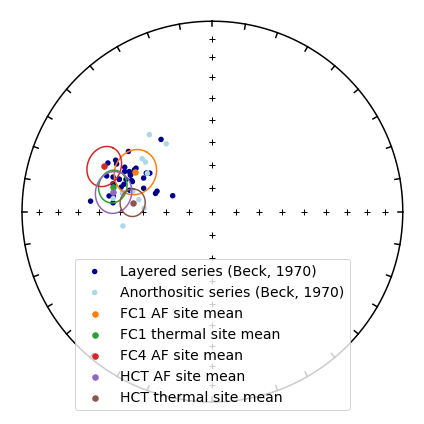

In [70]:
plt.figure(figsize=(6,6))
ipmag.plot_net()
ipmag.plot_di(Beck_Layered_series['dec_tc'].tolist(),
              Beck_Layered_series['inc_tc'].tolist(),color='darkblue',
              label='Layered series (Beck, 1970)',markersize=30)
ipmag.plot_di(Beck_Anorthositic_series['dec_tc'].tolist(),
              Beck_Anorthositic_series['inc_tc'].tolist(),color='lightblue',
              label='Anorthositic series (Beck, 1970)',markersize=30)

ipmag.plot_di_mean(FC1_AF['dec_tc'].tolist()[0],
              FC1_AF['inc_tc'].tolist()[0], FC1_AF['dir_alpha95'].tolist()[0], color='C1',
              label='FC1 AF site mean',markersize=30)
ipmag.plot_di_mean(FC1_thermal['dec_tc'].tolist()[0],
              FC1_thermal['inc_tc'].tolist()[0], FC1_thermal['dir_alpha95'].tolist()[0], color='C2',
              label='FC1 thermal site mean',markersize=30)
ipmag.plot_di_mean(FC4_AF['dec_tc'].tolist()[0],
              FC4_AF['inc_tc'].tolist()[0], FC4_AF['dir_alpha95'].tolist()[0], color='C3',
              label='FC4 AF site mean',markersize=30)
ipmag.plot_di_mean(HCT_AF['dec_tc'].tolist()[0],
              HCT_AF['inc_tc'].tolist()[0], HCT_AF['dir_alpha95'].tolist()[0], color='C4',
              label='HCT AF site mean',markersize=30)
ipmag.plot_di_mean(HCT_thermal['dec_tc'].tolist()[0],
              HCT_thermal['inc_tc'].tolist()[0], HCT_thermal['dir_alpha95'].tolist()[0], color='C5',
              label='HCT thermal site mean',markersize=30)

plt.legend(loc=8,fontsize=14)
plt.savefig('./code_output/site_directions.pdf')
plt.show()

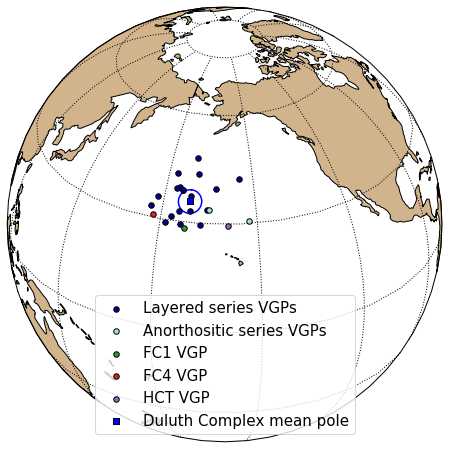

In [71]:
map_axis = ipmag.make_orthographic_map(central_longitude=200,central_latitude=30)
ipmag.plot_vgp(map_axis,vgp_lon=Beck_Layered_filtered.vgp_lon,
               vgp_lat=Beck_Layered_filtered.vgp_lat,color='darkblue',
               label='Layered series VGPs',markersize=30)
ipmag.plot_vgp(map_axis,vgp_lon=Beck_Anorthositic_filtered.vgp_lon,
               vgp_lat=Beck_Anorthositic_filtered.vgp_lat,color='lightblue',
               label='Anorthositic series VGPs',markersize=30)
ipmag.plot_vgp(map_axis,vgp_lon=FC1_thermal.vgp_lon.tolist()[0],
               vgp_lat=FC1_thermal.vgp_lat.tolist()[0],color='C2',
               label='FC1 VGP',markersize=30)
ipmag.plot_vgp(map_axis,vgp_lon=FC4_AF.vgp_lon.tolist()[0],
               vgp_lat=FC4_AF.vgp_lat.tolist()[0],color='C3',
               label='FC4 VGP',markersize=30)
ipmag.plot_vgp(map_axis,vgp_lon=HCT_thermal.vgp_lon.tolist()[0],
               vgp_lat=HCT_thermal.vgp_lat.tolist()[0],color='C4',
               label='HCT VGP',markersize=30)

layered_lons = Beck_Layered_filtered.vgp_lon.tolist()
layered_lats = Beck_Layered_filtered.vgp_lat.tolist()
anorthositic_lons = Beck_Anorthositic_filtered.vgp_lon.tolist()
anorthositic_lats = Beck_Anorthositic_filtered.vgp_lat.tolist()
new_vgp_lons = HCT_thermal.vgp_lon.tolist() + FC4_AF.vgp_lon.tolist() + FC1_thermal.vgp_lon.tolist()
new_vgp_lats = HCT_thermal.vgp_lat.tolist() + FC4_AF.vgp_lat.tolist() + FC1_thermal.vgp_lat.tolist()

Duluth_Complex_pole = ipmag.fisher_mean(layered_lons+anorthositic_lons+new_vgp_lons,
                                     layered_lats+anorthositic_lats+new_vgp_lats)
ipmag.plot_pole(map_axis,Duluth_Complex_pole['dec'],Duluth_Complex_pole['inc'],Duluth_Complex_pole['alpha95'], 
                color ='blue', marker='s',
                label = 'Duluth Complex mean pole',markersize=40)

plt.legend(loc=8, scatterpoints=1, fontsize=15)
plt.savefig('./code_output/Duluth_complex_VGPs.pdf')
plt.show()

In [72]:
ipmag.print_pole_mean(Duluth_Complex_pole)

Plon: 188.7  Plat: 35.6
Number of directions in mean (n): 24
Angular radius of 95% confidence (A_95): 3.1
Precision parameter (k) estimate: 91.1


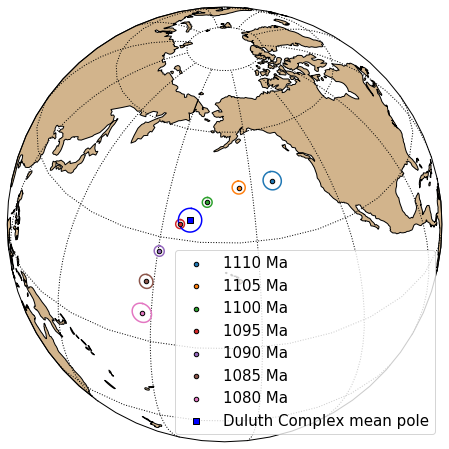

In [73]:
one_Euler_pole_lon = np.loadtxt('../data/mcplates_results/pole_lon_positions1.txt')
one_Euler_pole_lat = np.loadtxt('../data/mcplates_results/pole_lat_positions1.txt')

m = ipmag.make_orthographic_map(central_latitude=35,central_longitude=200)

fisher0 = ipmag.fisher_mean(one_Euler_pole_lon[:,0]+180,one_Euler_pole_lat[:,0])
theta0 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,0]+180,one_Euler_pole_lat[:,0])
fisher0['theta'] = theta0
ipmag.plot_pole(m,fisher0['dec'],fisher0['inc'],theta0,color='C0',label='1110 Ma')

fisher1 = ipmag.fisher_mean(one_Euler_pole_lon[:,1]+180,one_Euler_pole_lat[:,1])
theta1 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,1]+180,one_Euler_pole_lat[:,1])
fisher1['theta'] = theta1
ipmag.plot_pole(m,fisher1['dec'],fisher1['inc'],theta1,color='C1',label='1105 Ma')

fisher2 = ipmag.fisher_mean(one_Euler_pole_lon[:,2]+180,one_Euler_pole_lat[:,2])
theta2 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,2]+180,one_Euler_pole_lat[:,2])
fisher2['theta'] = theta2
ipmag.plot_pole(m,fisher2['dec'],fisher2['inc'],theta2,color='C2',label='1100 Ma')

fisher3 = ipmag.fisher_mean(one_Euler_pole_lon[:,3]+180,one_Euler_pole_lat[:,3])
theta3 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,3]+180,one_Euler_pole_lat[:,3])
fisher3['theta'] = theta3
ipmag.plot_pole(m,fisher3['dec'],fisher3['inc'],theta3,color='C3',label='1095 Ma')

fisher4 = ipmag.fisher_mean(one_Euler_pole_lon[:,4]+180,one_Euler_pole_lat[:,4])
theta4 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,4]+180,one_Euler_pole_lat[:,4])
fisher4['theta'] = theta4
ipmag.plot_pole(m,fisher4['dec'],fisher4['inc'],theta4,color='C4',label='1090 Ma')

fisher5 = ipmag.fisher_mean(one_Euler_pole_lon[:,5]+180,one_Euler_pole_lat[:,5])
theta5 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,5]+180,one_Euler_pole_lat[:,5])
fisher5['theta'] = theta5
ipmag.plot_pole(m,fisher5['dec'],fisher5['inc'],theta5,color='C5',label='1085 Ma')

fisher6 = ipmag.fisher_mean(one_Euler_pole_lon[:,6]+180,one_Euler_pole_lat[:,6])
theta6 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,6]+180,one_Euler_pole_lat[:,6])
fisher6['theta'] = theta6
ipmag.plot_pole(m,fisher6['dec'],fisher6['inc'],theta6,color='C6',label='1080 Ma')

ipmag.plot_pole(m,Duluth_Complex_pole['dec'],Duluth_Complex_pole['inc'],Duluth_Complex_pole['alpha95'], 
                color ='blue', marker='s', label = 'Duluth Complex mean pole',markersize=30)
plt.legend(loc=4, fontsize=15)
plt.savefig('./code_output/Duluth_Complex_Euler_Path.pdf')
plt.show()

In [74]:
Duluth_lat = 46.79
Duluth_lon = -92.10

print('Duluth paleolatitude at 1110 Ma (1 Euler inversion):')
print(ipmag.lat_from_pole(Duluth_lon, Duluth_lat, fisher0['dec'], fisher0['inc']))
print('')
print('Duluth paleolatitude at 1105 Ma (1 Euler inversion):')
print(ipmag.lat_from_pole(Duluth_lon, Duluth_lat, fisher1['dec'], fisher1['inc']))
print('')
print('Duluth paleolatitude at 1100 Ma (1 Euler inversion):')
print(ipmag.lat_from_pole(Duluth_lon, Duluth_lat, fisher2['dec'], fisher2['inc']))
print('')
print('Duluth paleolatitude at 1095 Ma (1 Euler inversion):')
print(ipmag.lat_from_pole(Duluth_lon, Duluth_lat, fisher3['dec'], fisher3['inc']))
print('')
print('Duluth paleolatitude implied by Duluth Complex pole:')
print(ipmag.lat_from_pole(Duluth_lon, Duluth_lat, Duluth_Complex_pole['dec'],Duluth_Complex_pole['inc']))

Duluth paleolatitude at 1110 Ma (1 Euler inversion):
56.087281584905

Duluth paleolatitude at 1105 Ma (1 Euler inversion):
47.36765244697051

Duluth paleolatitude at 1100 Ma (1 Euler inversion):
38.19752912645617

Duluth paleolatitude at 1095 Ma (1 Euler inversion):
29.094926428672316

Duluth paleolatitude implied by Duluth Complex pole:
31.903681735535827


In [75]:
North_Shore

,site,location,samples,specimens,dir_alpha95,dir_comp_name,dir_dec,dir_inc,dir_k,dir_n_samples,dir_n_specimens,dir_n_specimens_lines,dir_n_specimens_planes,dir_polarity,dir_r,dir_tilt_correction,lat,lon,analysts,criteria,software_packages,citations,method_codes,result_quality,dec_tc,inc_tc,paleolatitude,vgp_lat,vgp_lon,vgp_lat_rev,vgp_lon_rev
2,FC1,North,FC1-1:FC1-2:FC1-3:FC1-4:FC1-5:FC1-6:FC1-7:FC1-...,FC1-1a:FC1-2a:FC1-3a:FC1-4a:FC1-5a:FC1-6a:FC1-...,9.3,mc,301.6,40.5,32,9,9,9,0,NaN,8.7489,0,47.7826,-91.3265,Yiming Zhang,ACCEPT,pmagpy-4.2.25: demag_gui.v.3.0,This study,LP-DIR-AF:DE-BFL:DA-DIR-GEO:LP-DC4:DE-FM,g,297.134482,52.385273,32.980271,41.316929,184.974390,-41.316929,4.974390
3,FC1,North,FC1-1:FC1-2:FC1-3:FC1-4:FC1-5:FC1-6:FC1-7:FC1-...,FC1-1b:FC1-2b:FC1-3b:FC1-4b:FC1-5b:FC1-6b:FC1-...,6.5,mt,289.7,34.4,64,9,9,9,0,NaN,8.8741,0,47.7826,-91.3265,Yiming Zhang,ACCEPT,pmagpy-4.2.25: demag_gui.v.3.0,This study,LP-DIR-T:DE-BFL:DA-DIR-GEO:LP-DC4:DE-FM,g,284.110929,45.103706,26.648106,28.593061,187.847898,-28.593061,7.847898
6,FC4,North,FC4-1:FC4-2:FC4-3:FC4-6:FC4-7:FC4-8:FC4-9,FC4-1a:FC4-2a:FC4-3a:FC4-6a:FC4-7a:FC4-8a:FC4-9a,7.9,mc,296.0,26.8,59,7,7,7,0,NaN,6.8977,0,47.7625,-91.3827,NaN,ACCEPT,pmagpy-4.2.25: demag_gui.v.3.0,This study,LP-DIR-AF:DE-BFL:DA-DIR-GEO:LP-DC4:DE-FM,g,292.632873,38.265560,21.523703,30.815285,177.388326,-30.815285,357.388326
9,HCT1,North,HCT1-1:HCT1-2:HCT1-3:HCT1-5:HCT1-6:HCT1-7:HCT1-8,HCT1-1a:HCT1-2a:HCT1-3a:HCT1-5a:HCT1-6a:HCT1-7...,8.3,mc,287.2,35.6,54,7,7,7,0,NaN,6.8893,0,47.6008,-91.1495,Yiming Zhang,ACCEPT,pmagpy-4.2.25: demag_gui.v.3.0,This study,LP-DIR-AF:DE-BFL:DA-DIR-GEO:LP-DC4:DE-FM,g,280.953111,45.964685,27.344701,26.937064,190.833620,-26.937064,10.833620
10,HCT1,North,HCT1-1:HCT1-2:HCT1-3:HCT1-5:HCT1-6:HCT1-8,HCT1-1b:HCT1-2b:HCT1-3b:HCT1-5b:HCT1-6b:HCT1-8b,5.6,mt,285.7,45.3,144,6,6,6,0,NaN,5.9652,0,47.6008,-91.1495,Yiming Zhang,ACCEPT,pmagpy-4.2.25: demag_gui.v.3.0,This study,LP-DIR-T:DE-BFL:DA-DIR-GEO:LP-DC4:DE-FM,g,276.317559,55.283566,35.816076,29.492268,201.037076,-29.492268,21.037076


In [76]:
North_Shore.to_latex(columns=['site', 'lat', 'lon','dir_n_samples','dir_dec','dir_inc','dec_tc','inc_tc','dir_k','dir_alpha95','vgp_lat','vgp_lon'])

'\\begin{tabular}{llrrrrrrrrrrr}\n\\toprule\n{} &  site &      lat &      lon &  dir\\_n\\_samples &  dir\\_dec &  dir\\_inc &      dec\\_tc &     inc\\_tc &  dir\\_k &  dir\\_alpha95 &    vgp\\_lat &     vgp\\_lon \\\\\n\\midrule\n2  &   FC1 &  47.7826 & -91.3265 &              9 &    301.6 &     40.5 &  297.134482 &  52.385273 &     32 &          9.3 &  41.316929 &  184.974390 \\\\\n3  &   FC1 &  47.7826 & -91.3265 &              9 &    289.7 &     34.4 &  284.110929 &  45.103706 &     64 &          6.5 &  28.593061 &  187.847898 \\\\\n6  &   FC4 &  47.7625 & -91.3827 &              7 &    296.0 &     26.8 &  292.632873 &  38.265560 &     59 &          7.9 &  30.815285 &  177.388326 \\\\\n9  &  HCT1 &  47.6008 & -91.1495 &              7 &    287.2 &     35.6 &  280.953111 &  45.964685 &     54 &          8.3 &  26.937064 &  190.833620 \\\\\n10 &  HCT1 &  47.6008 & -91.1495 &              6 &    285.7 &     45.3 &  276.317559 &  55.283566 &    144 &          5.6 &  29.492268 &  201.0

In [77]:
#North_Shore.to_excel('./code_output/North_Shore_Data.xls',columns=['site', 'lat', 'lon','dir_n_samples','dir_dec','dir_inc','dec_tc','inc_tc','dir_k','dir_alpha95','vgp_lat','vgp_lon'])
#Beck_Anorthositic_series_tilt_corrected.to_excel('./code_output/Beck_anorthosite.xls',columns=['site', 'lat', 'lon','dir_n_samples','dir_dec','dir_inc','dec_tc','inc_tc','dir_k','dir_alpha95','vgp_lat','vgp_lon'])
#Beck_Layered_series_tilt_corrected.to_excel('./code_output/Beck_layered.xls',columns=['site', 'lat', 'lon','dir_n_samples','dir_dec','dir_inc','dec_tc','inc_tc','dir_k','dir_alpha95','vgp_lat','vgp_lon'])

# Duluth Complex area

The area of the Duluth Complex can be calculated from the polygons of the S21 MN Geological map. This csv file was output from QGIS where the area of the polygons were calculated. The polygons of each unit can be grouped and summed to calculate the overall area.

In [78]:
MN_geo_polygons = pd.read_csv('../data/geology/MN_geology_polygons.csv')
MN_geo_polygons.head()

,AREA,PERIMETER,TYPE,GCM_CODE,GEOC_SRC,GEOC_DATE,UTME,UTMN,UTM_ZONE,MAPLABEL,DESCRIPTN,UNIT_NAME,TERRANE,ERA,SUBDIV,AREA_CALC
0,1.055855e+06,5101.682095,BG,AB,MGS,20101215,344100,5471393,15,Amv,Mafic metavolcanic rocks; minor volcaniclastic...,NaN,Wabigoon subprovince,Neoarchean,Superior Province,1056082.0
1,4.058488e+06,8978.228037,BG,AB,MGS,20101215,344483,5470243,15,Asd,"Syenitic, monzodioritic, or dioritic pluton",NaN,massive to weakly foliated,Neoarchean,Superior Province,4059328.0
2,5.945258e+07,63606.085456,BG,AB,MGS,20101215,353379,5466664,15,Agr,Granitic intrusion,NaN,massive to weakly foliated,Neoarchean,Superior Province,59467613.0
3,7.830187e+06,23317.507491,BG,AB,MGS,20101215,355501,5469271,15,Amv,Mafic metavolcanic rocks; minor volcaniclastic...,NaN,Wabigoon subprovince,Neoarchean,Superior Province,7832350.0
4,2.492758e+07,50540.399729,BG,AB,MGS,20101215,353660,5465002,15,Avs,Volcanic and volcaniclastic rocks; felsic to i...,NaN,Wabigoon subprovince,Neoarchean,Superior Province,24934273.0


In [79]:
anortho_polygons = MN_geo_polygons[MN_geo_polygons.MAPLABEL == "Mau"]
layered_polygons = MN_geo_polygons[(MN_geo_polygons.MAPLABEL == "Mlc") | (MN_geo_polygons.MAPLABEL == "Mlf") | 
                                   (MN_geo_polygons.MAPLABEL == "Mlg") | (MN_geo_polygons.MAPLABEL == "Mlt")]
early_gabbro_polygons = MN_geo_polygons[MN_geo_polygons.MAPLABEL == "Mge"]
felsic_series_polygons = MN_geo_polygons[MN_geo_polygons.MAPLABEL == "Mfg"]
HCT_polygons = MN_geo_polygons[(MN_geo_polygons.MAPLABEL == "Mbt")]
BBC_polygons = MN_geo_polygons[(MN_geo_polygons.MAPLABEL == "Mbd") | (MN_geo_polygons.MAPLABEL == "Mbf")|
                                (MN_geo_polygons.MAPLABEL == "Mbg")]

Calculate the area in square kilometers

In [80]:
anorthositic_area = anortho_polygons.AREA.sum()/(1000*1000)
anorthositic_area

2312.0925388010287

In [81]:
layered_area = layered_polygons.AREA.sum()/(1000*1000)
layered_area

2568.5970853061776

In [82]:
early_gabbro_area = early_gabbro_polygons.AREA.sum()/(1000*1000)
early_gabbro_area

260.0774290471

In [83]:
felsic_series_area = felsic_series_polygons.AREA.sum()/(1000*1000)
felsic_series_area

490.84322160180295

In [84]:
anorthositic_area + layered_area + early_gabbro_area + felsic_series_area

5631.610274756109

In [85]:
HCT_area = HCT_polygons.AREA.sum()/(1000*1000)
HCT_area

150.190668502

In [86]:
BBC_area = BBC_polygons.AREA.sum()/(1000*1000)
BBC_area

1035.8102578461144

Volume estimates for the Duluth Complex are uncertain. Here we develop a rough estimate for the volume of the layered+anorthositic series of the Duluth Complex.

The exposed strike length from Duluth to the Gunflint trail is 192 km. The exposed surface width varies from ~15 km to ~40 km. However, it is typically ~35 km. The dip is typically ~20º.

At a minimum the Duluth Complex extends under the NSVG which would be a projected surface width of ~65 km. It likely extends in Lake Superior of a width of ~100 km.

In [87]:
Duluth_Complex_strike_length = 220 #exposed strike length of the Duluth Complex (km)
Duluth_Complex_as_the_crow_flies = 35 #exposed surface width of the Duluth Complex (km)
Duluth_Complex_dip = 20

Duluth_Complex_surface_width = 100 #interpreted surface width of the Duluth Complex

Duluth_Complex_width = Duluth_Complex_surface_width/np.cos(np.deg2rad(Duluth_Complex_dip))
Duluth_Complex_thickness = np.sin(np.deg2rad(Duluth_Complex_dip))*Duluth_Complex_as_the_crow_flies
Duluth_Complex_thickness

11.970705016398405

In [88]:
Duluth_Complex_volume = Duluth_Complex_width*Duluth_Complex_thickness*Duluth_Complex_strike_length
Duluth_Complex_volume

280257.08038497576

This estimate has the volume of the Duluth Complex as 280,000 km$^3$. For comparison, the Columbia River flood basalts have an estimated volume of 174,000 km$^3$ (Tolan et al. 1989).